 # About Dataset
This dataset comprises of fractured and non-fractured x-ray images of several joints. The task is to build an image classifier to detect fractures in given x-ray image. This dataset comprises of different joints in the upper extremities, isolation of individual joints is recommended for enhanced performance of classifiers.

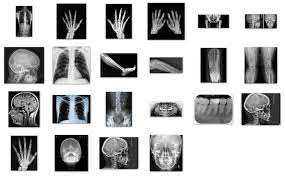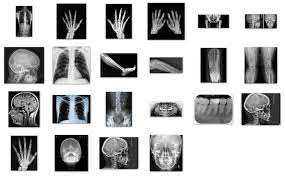

In [3]:
# Import libraries for image processing, data handling, and machine learning
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import feature
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Import machine learning models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import metrics for evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set seaborn theme for better plots
sns.set_theme(style="white", rc={'figure.figsize': (11.7, 8.27)})

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [4]:
def extract_hog_features(image_path):
    image = cv2.imread(image_path)
    
    # Check if the image is loaded correctly
    if image is None:
        print(f"Error loading image: {image_path}")
        return None
    
    # Resize image and convert to grayscale
    resized_image = cv2.resize(image, (64, 64))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features
    hog_features = feature.hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
    
    return hog_features


In [5]:
features_list = []
targets = []

# Define paths to fractured and not fractured image folders and their corresponding target values
folder_paths = ['C:\\Users\\user\\Desktop\\project_models\\Bone_prediction\\Bone_Fracture_Binary_Classification\\train\\fractured', 
                'C:\\Users\\user\\Desktop\\project_models\\Bone_prediction\\Bone_Fracture_Binary_Classification\\train\\not fractured']  
target_values = ["fractured", "not fractured"]  

# Loop through each folder and corresponding target value
for folder_path, target in zip(folder_paths, target_values):
    for filename in os.listdir(folder_path):  # Loop through each file in the folder
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'): 
            image_path = os.path.join(folder_path, filename)  # Full path to the image
            try:
                # Extract HOG features and append to lists
                features = extract_hog_features(image_path)
                features_list.append(features)
                targets.append(target)  
            except FileNotFoundError as e:
                print(e)  # Handle file not found errors


Error loading image: C:\Users\user\Desktop\project_models\Bone_prediction\Bone_Fracture_Binary_Classification\train\fractured\159.jpg
Error loading image: C:\Users\user\Desktop\project_models\Bone_prediction\Bone_Fracture_Binary_Classification\train\fractured\2.jpg
Error loading image: C:\Users\user\Desktop\project_models\Bone_prediction\Bone_Fracture_Binary_Classification\train\fractured\26(1).jpg


In [6]:
def display_images_with_folder_name(folder_path):
    if not os.path.isdir(folder_path):
        print(f"Error: The folder path '{folder_path}' does not exist.")
        return
    
    images = [filename for filename in os.listdir(folder_path) 
              if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if not images:
        print(f"No images found in the folder '{folder_path}'.")
        return

    num_images = min(5, len(images))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        img_path = os.path.join(folder_path, images[i])
        img = cv2.imread(img_path)
        
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img)
            axes[i].set_title(images[i])
            axes[i].axis('on')
        else:
            print(f"Error loading image '{images[i]}'. Skipping.")
            axes[i].axis('off')
    
    folder_name = os.path.basename(folder_path)
    fig.suptitle(f"Folder: {folder_name}", fontsize=16)
    plt.tight_layout(pad=2)
    plt.show()

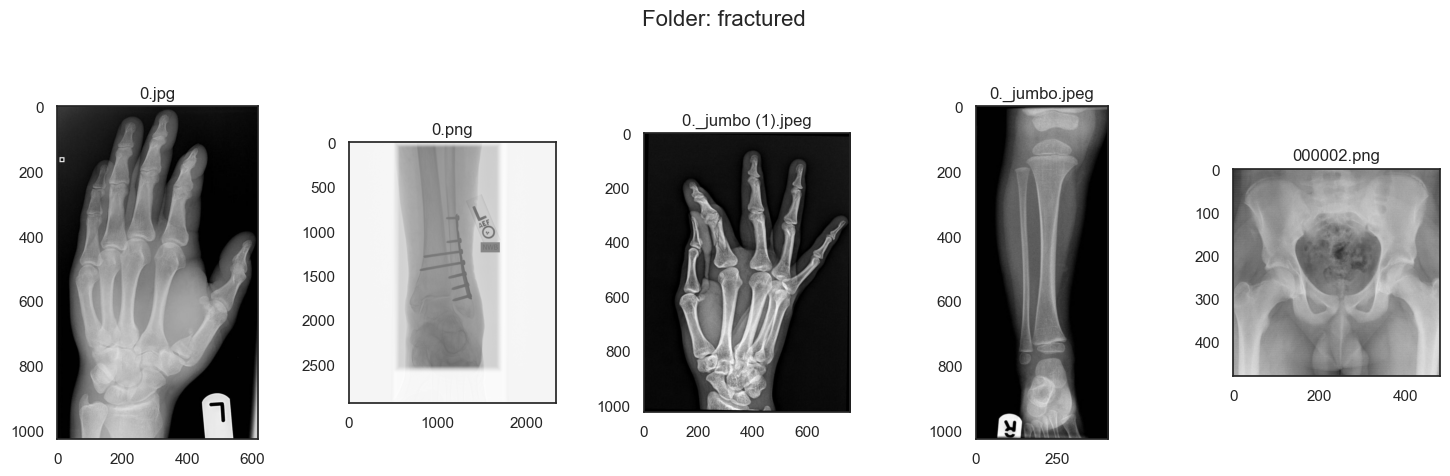

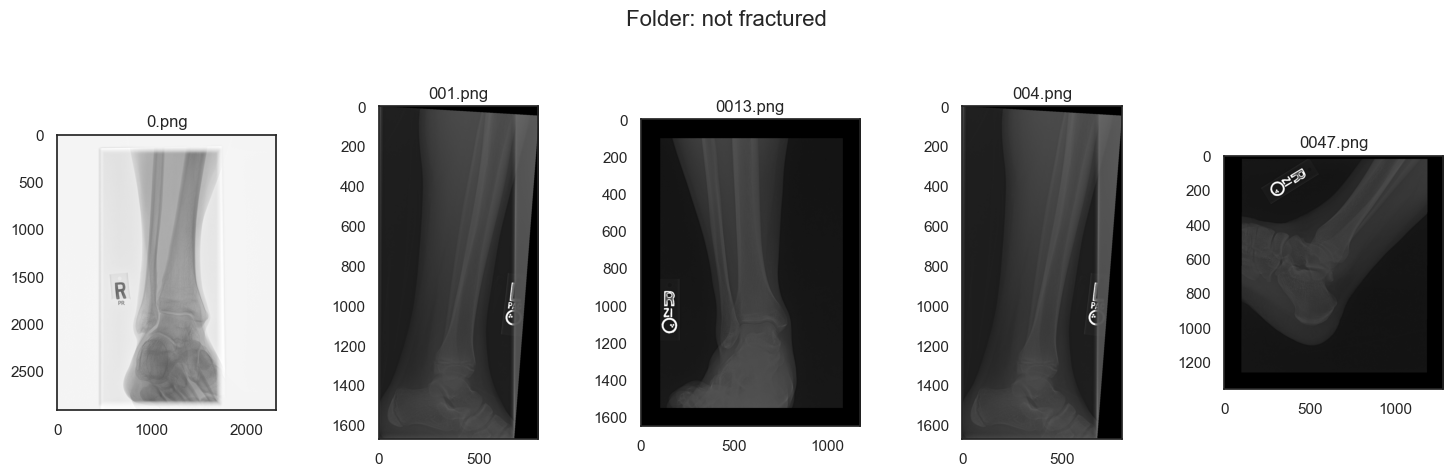

In [7]:
for folder_path in folder_paths:
   display_images_with_folder_name(folder_path)

In [8]:
def display_images_with_folder_name_gray(folder_path):
    images = [filename for filename in os.listdir(folder_path) 
              if filename.endswith(('.jpg', '.jpeg', '.png'))]
    
    num_images = min(5, len(images))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        img_path = os.path.join(folder_path, images[i])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(images[i])
        axes[i].axis('on')  # Show axis for each image
    
    folder_name = os.path.basename(folder_path)
    fig.suptitle(f"Folder: {folder_name}", fontsize=16)
    plt.tight_layout(pad=2)
    plt.show()

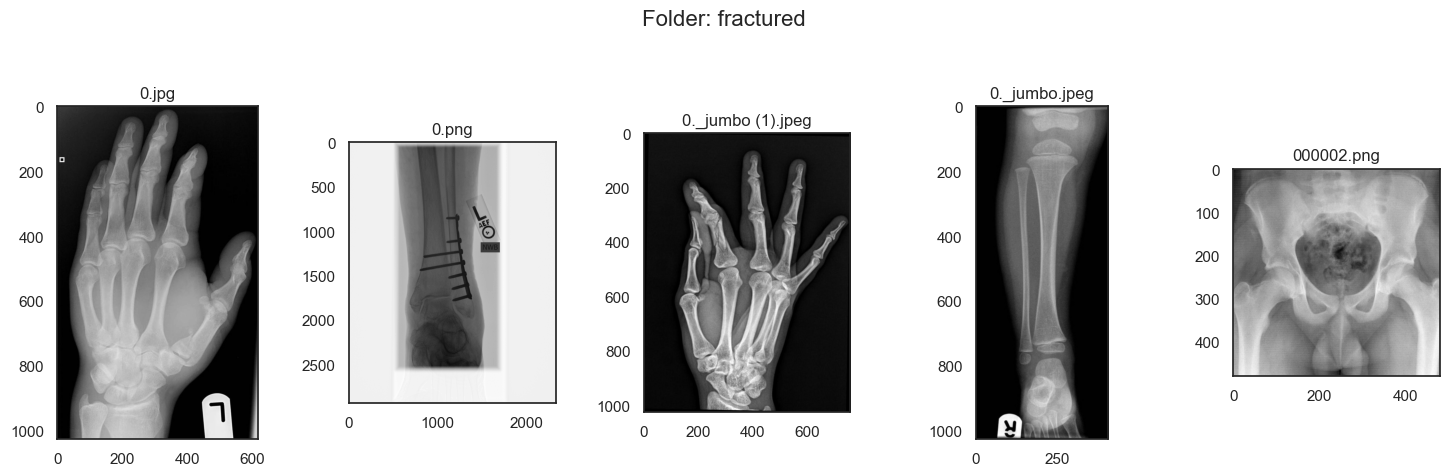

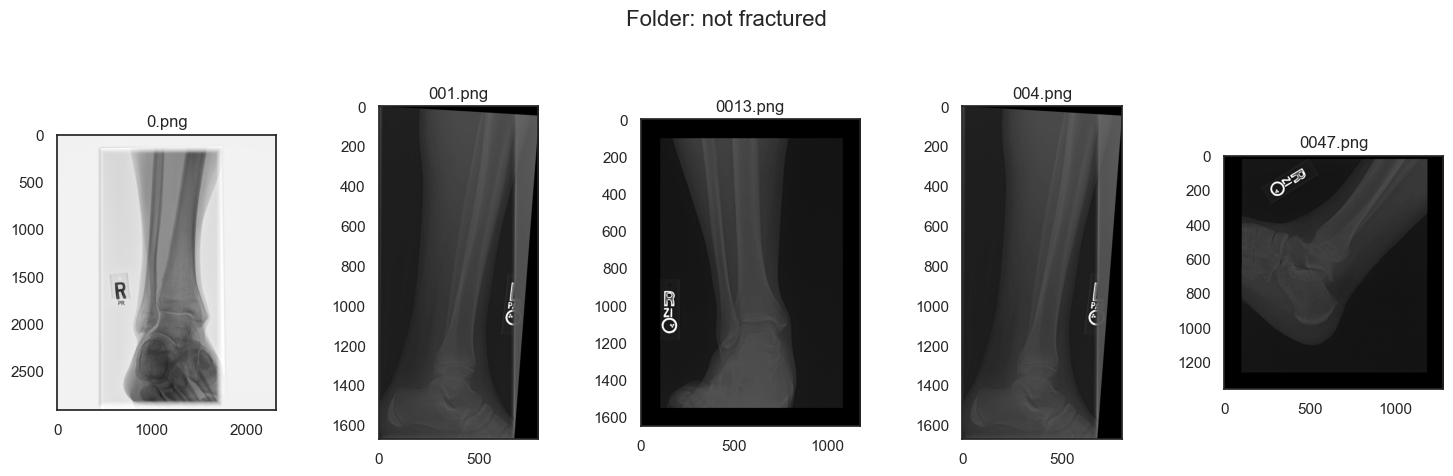

In [9]:
for folder_path in folder_paths:
   display_images_with_folder_name_gray(folder_path)

In [10]:
for i, features in enumerate(features_list):
    print(f"Feature {i} shape: {features.shape}")
    if i==10:
        break

Feature 0 shape: (324,)
Feature 1 shape: (324,)
Feature 2 shape: (324,)
Feature 3 shape: (324,)
Feature 4 shape: (324,)
Feature 5 shape: (324,)
Feature 6 shape: (324,)
Feature 7 shape: (324,)
Feature 8 shape: (324,)
Feature 9 shape: (324,)
Feature 10 shape: (324,)


In [11]:
features_list

[array([0.04808   , 0.08681234, 0.20863303, 0.19972487, 0.05652193,
        0.01402465, 0.00720554, 0.00389014, 0.00651124, 0.29462152,
        0.29462152, 0.29462152, 0.17388238, 0.10825102, 0.02870492,
        0.06883224, 0.11085013, 0.10086226, 0.29462152, 0.29462152,
        0.17552209, 0.06091232, 0.04786906, 0.04407434, 0.03526858,
        0.05855472, 0.15745249, 0.29462152, 0.25458726, 0.25061872,
        0.06556827, 0.1431285 , 0.06849923, 0.15387384, 0.13712497,
        0.21130087, 0.26665914, 0.26665914, 0.26665914, 0.12538431,
        0.0780584 , 0.02069874, 0.04963403, 0.07993258, 0.07273046,
        0.26665914, 0.26665914, 0.26665914, 0.15130478, 0.09326582,
        0.06790434, 0.06412908, 0.08405762, 0.11106411, 0.26665914,
        0.18357955, 0.18071789, 0.04728042, 0.10320809, 0.0493939 ,
        0.11095642, 0.09887902, 0.1523663 , 0.26665914, 0.26665914,
        0.17132171, 0.04322812, 0.04619547, 0.07687104, 0.11367222,
        0.11684145, 0.26665914, 0.29411602, 0.29

In [12]:
# Initial features_list and targets
features_list = [f for f in features_list if f is not None]

# Assuming targets is defined and should match the original features_list
# Ensure targets have the same length as the original features_list before filtering
# Create a new list to hold filtered targets
filtered_targets = [targets[i] for i in range(len(features_list)) if features_list[i] is not None]

# Proceed to filter and pad features_list
feature_lengths = [len(f) if isinstance(f, (list, np.ndarray)) else 0 for f in features_list]
print(f"Unique lengths: {set(feature_lengths)}")

max_len = max([len(f) for f in features_list if isinstance(f, (list, np.ndarray))])

# Pad or truncate feature vectors
features_list_padded = [
    list(f) + [0] * (max_len - len(f)) if len(f) < max_len else f[:max_len]
    for f in features_list
]

# Convert to NumPy array
X = np.array(features_list_padded)

# Create DataFrame
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Add the filtered targets to the DataFrame
data['target'] = filtered_targets

# Verify lengths
print(f"Data shape: {data.shape}")
print(f"Targets length: {len(filtered_targets)}")

Unique lengths: {324}
Data shape: (9347, 325)
Targets length: 9347


In [13]:
data.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.048080   0.086812   0.208633   0.199725   0.056522   0.014025   
1   0.307883   0.036147   0.000000   0.000000   0.006463   0.000000   
2   0.104897   0.045469   0.045993   0.047575   0.044669   0.059243   
3   0.249804   0.290694   0.014291   0.000000   0.015294   0.000000   
4   0.234648   0.172357   0.079099   0.155620   0.094315   0.067619   

   feature_6  feature_7  feature_8  feature_9  ...  feature_315  feature_316  \
0   0.007206   0.003890   0.006511   0.294622  ...     0.313809     0.001691   
1   0.000000   0.000000   0.307883   0.307883  ...     0.074607     0.001103   
2   0.011792   0.149731   0.061431   0.172501  ...     0.048777     0.009168   
3   0.000492   0.000777   0.004236   0.290694  ...     0.105476     0.007182   
4   0.052996   0.153778   0.222714   0.189006  ...     0.257455     0.078185   

   feature_317  feature_318  feature_319  feature_320  feature_321  \
0     0.149201     0.006656     0.313809     0.037844     0.277612   
1     0.002789     0.000000     0.016765     0.000000     0.008368   
2     0.006490     0.004974     0.010133     0.006829     0.007592   
3     0.000000     0.000000     0.000584     0.009934     0.037404   
4     0.039438     0.020274     0.041940     0.031479     0.022735   

   feature_322  feature_323     target  
0     0.116209     0.213859  fractured  
1     0.001103     0.008998  fractured  
2     0.009080     0.010919  fractured  
3     0.191317     0.068310  fractured  
4     0.054736     0.250030  fractured  

[5 rows x 325 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Columns: 325 entries, feature_0 to target
dtypes: float64(324), object(1)
memory usage: 23.2+ MB


In [15]:
data.describe()

feature_0    feature_1    feature_2    feature_3    feature_4  \
count  9347.000000  9347.000000  9347.000000  9347.000000  9347.000000   
mean      0.142898     0.102617     0.131492     0.078168     0.109932   
std       0.102733     0.086308     0.104726     0.078837     0.094770   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.051400     0.032514     0.036483     0.005742     0.020378   
50%       0.122640     0.083182     0.107505     0.055764     0.088628   
75%       0.235236     0.151613     0.226868     0.123721     0.183167   
max       0.547342     0.446497     0.572987     0.387654     0.479594   

         feature_5    feature_6    feature_7    feature_8    feature_9  ...  \
count  9347.000000  9347.000000  9347.000000  9347.000000  9347.000000  ...   
mean      0.033570     0.063091     0.070580     0.076455     0.234759  ...   
std       0.054124     0.087948     0.092203     0.087492     0.110181  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000890     0.003309     0.000953     0.008822     0.158937  ...   
50%       0.006090     0.010968     0.012492     0.038992     0.261796  ...   
75%       0.047569     0.102324     0.127685     0.118642     0.308564  ...   
max       0.397764     0.399325     0.386781     0.405444     0.517285  ...   

       feature_314  feature_315  feature_316  feature_317  feature_318  \
count  9347.000000  9347.000000  9347.000000  9347.000000  9347.000000   
mean      0.197975     0.151702     0.100183     0.147226     0.086731   
std       0.144016     0.124028     0.091377     0.119965     0.088198   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.048212     0.035720     0.028166     0.038604     0.007365   
50%       0.217489     0.118105     0.074432     0.118254     0.058848   
75%       0.319781     0.265323     0.147277     0.255241     0.140034   
max       0.529925     0.515375     0.474135     0.500365     0.385756   

       feature_319  feature_320  feature_321  feature_322  feature_323  
count  9347.000000  9347.000000  9347.000000  9347.000000  9347.000000  
mean      0.120586     0.027698     0.059831     0.079440     0.084129  
std       0.109583     0.049668     0.092988     0.106025     0.102507  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.020805     0.000824     0.003071     0.001636     0.008947  
50%       0.088091     0.005415     0.010062     0.015754     0.037849  
75%       0.199554     0.032642     0.080532     0.137545     0.125207  
max       0.563169     0.359361     0.427704     0.459640     0.454016  

[8 rows x 324 columns]

In [16]:
data.describe(include="object")

target
count        9347
unique          2
top     fractured
freq         4710

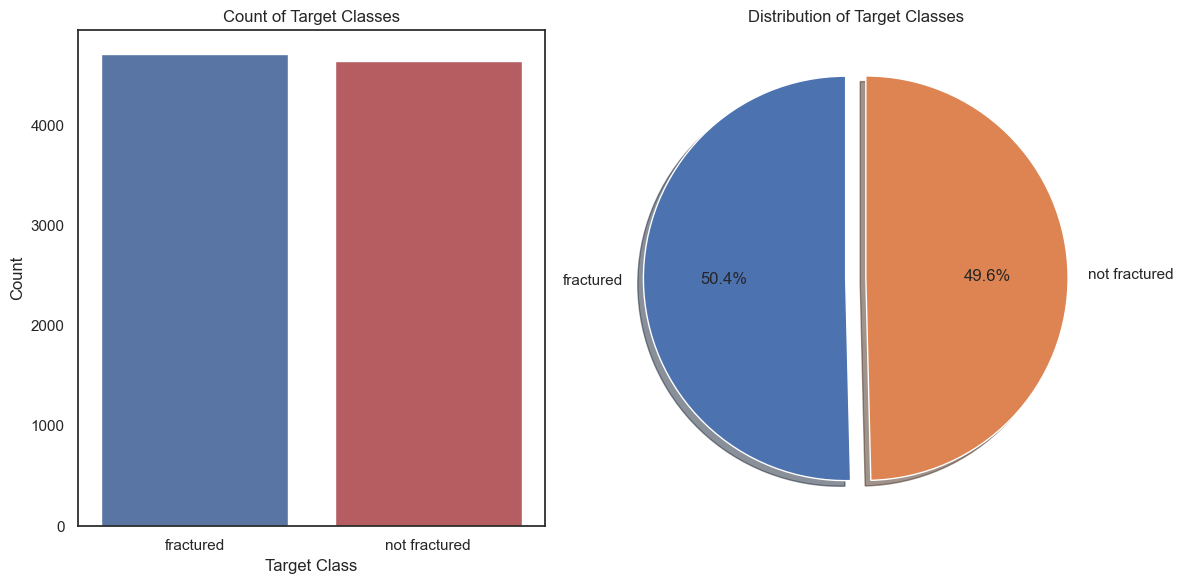

In [17]:
# Set up the figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=data["target"],palette=["b","r"])
plt.title('Count of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
plt.pie(data["target"].value_counts(), labels=data["target"].value_counts().index, autopct='%1.1f%%', startangle=90,shadow=True,explode=[.1,0])
plt.title('Distribution of Target Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plots
plt.tight_layout()
plt.show()


In [18]:
missing_value=pd.DataFrame(data.isnull().sum())
missing_value.head()

0
feature_0  0
feature_1  0
feature_2  0
feature_3  0
feature_4  0

In [19]:
missing_value[0].max() # no null value

0

In [20]:
# Replace target values
data['target'] = data['target'].replace(['fractured', 'not fractured'], [1, 0])

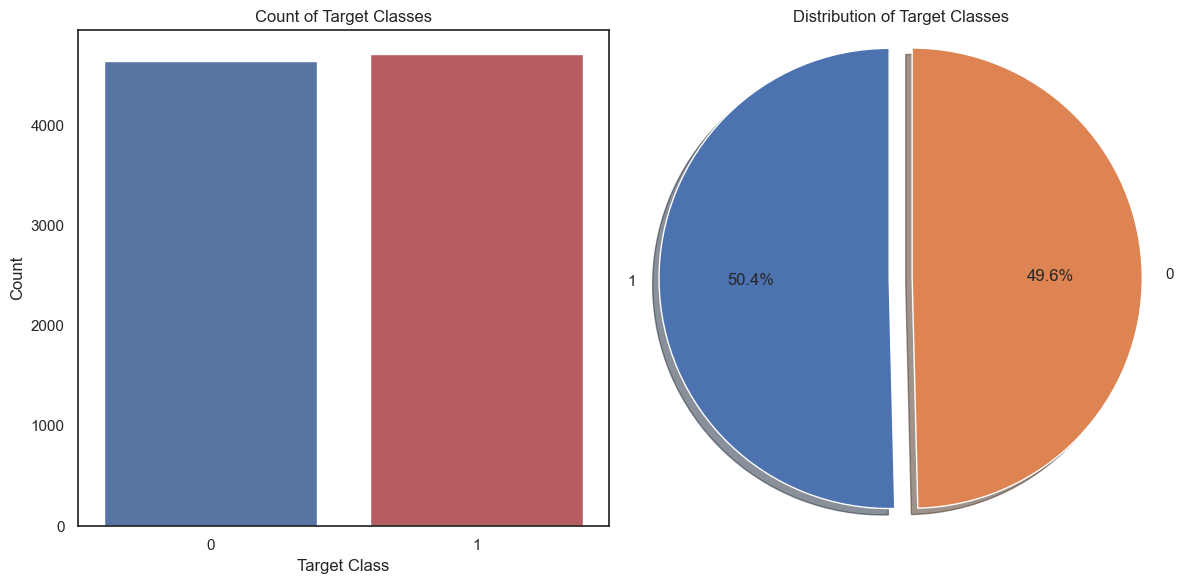

In [21]:
# Set up the figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=data["target"],palette=["b","r"])
plt.title('Count of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
plt.pie(data["target"].value_counts(), labels=data["target"].value_counts().index, autopct='%1.1f%%', startangle=90,shadow=True,explode=[.1,0])
plt.title('Distribution of Target Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plots
plt.tight_layout()
plt.show()


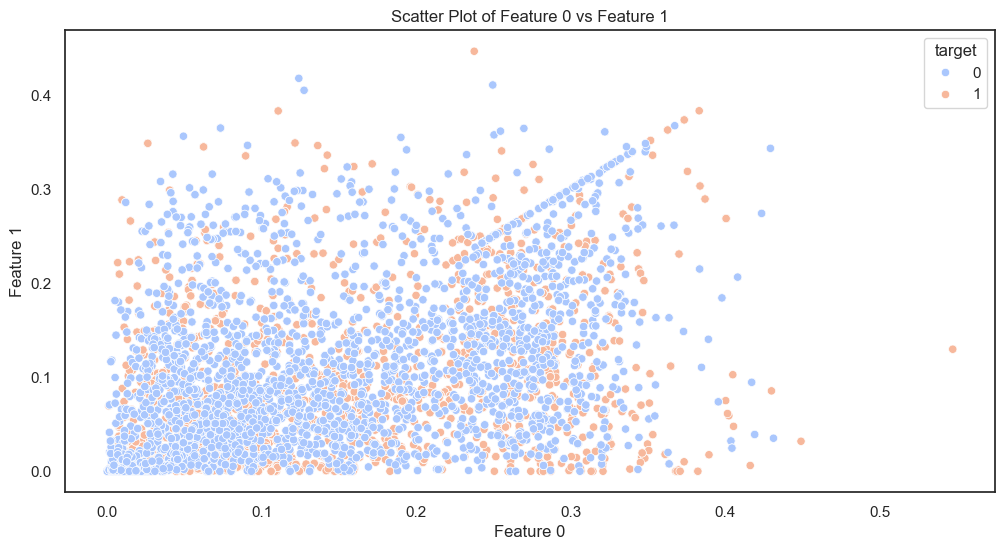

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='feature_0', y='feature_1', hue='target', palette='coolwarm')
plt.title('Scatter Plot of Feature 0 vs Feature 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

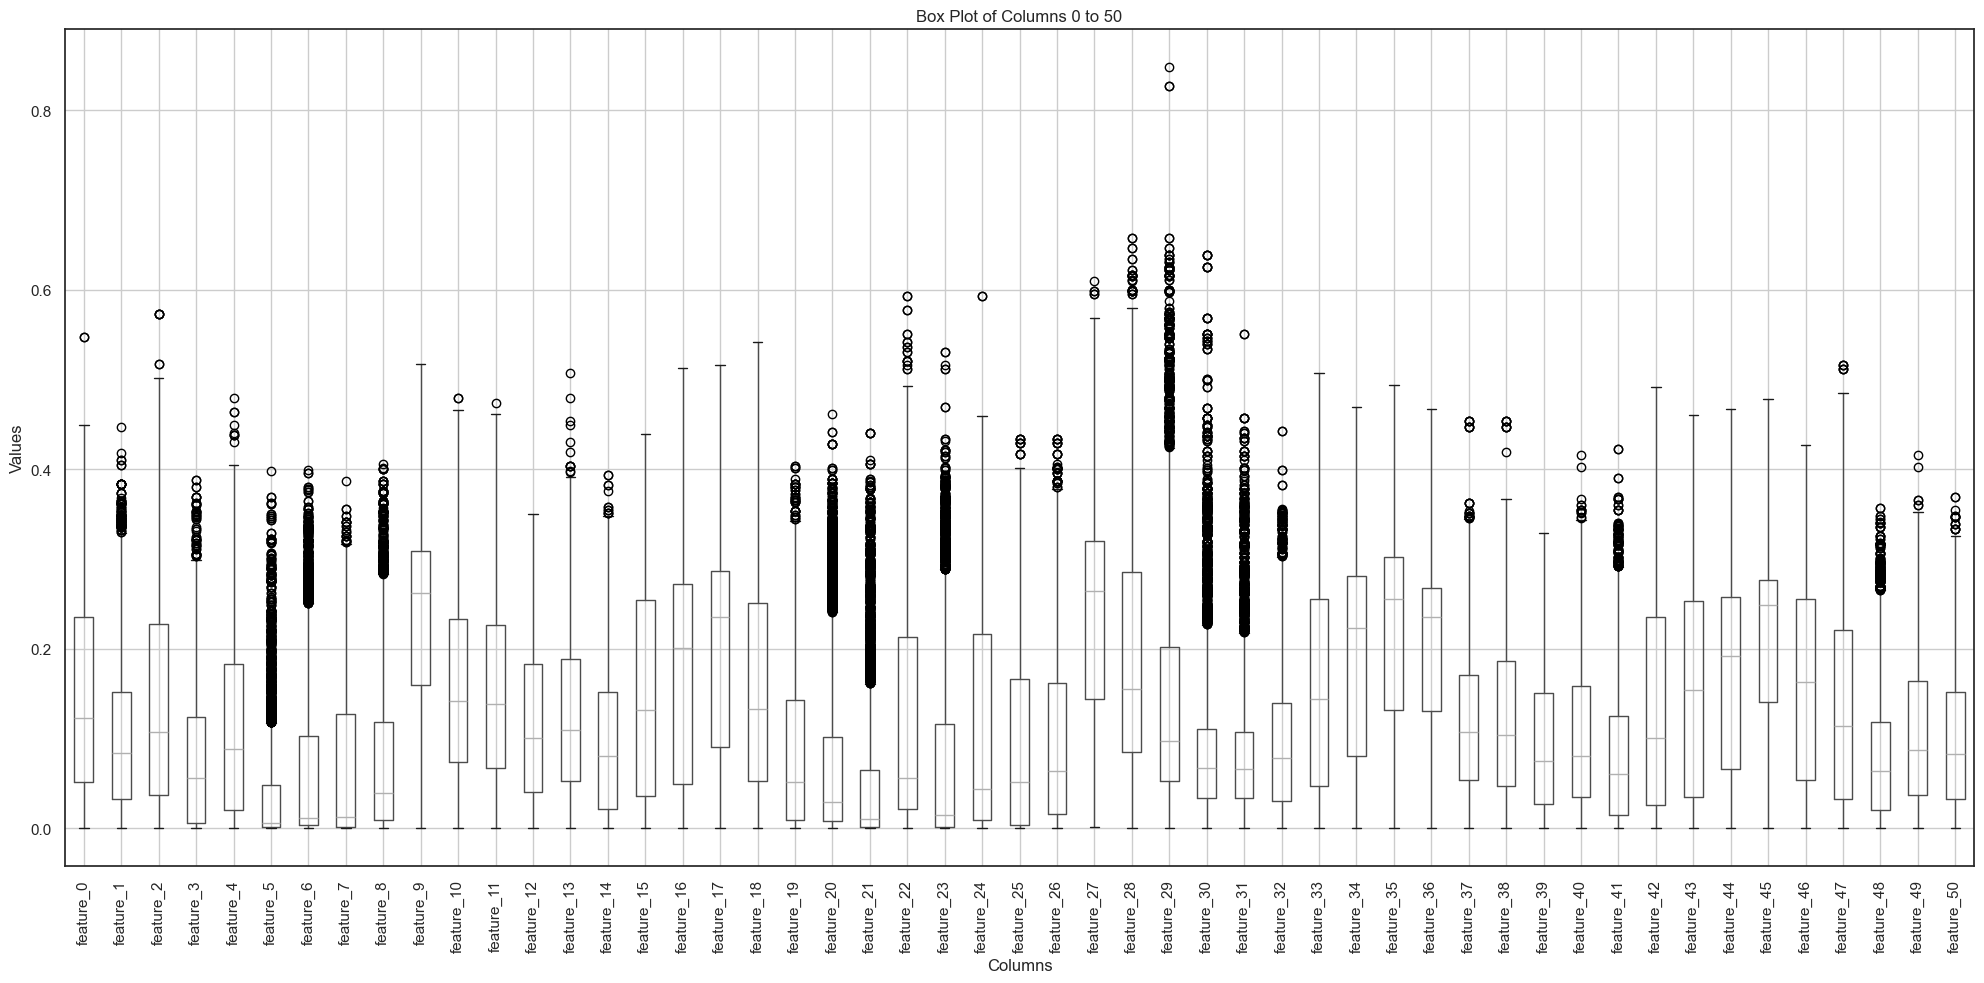

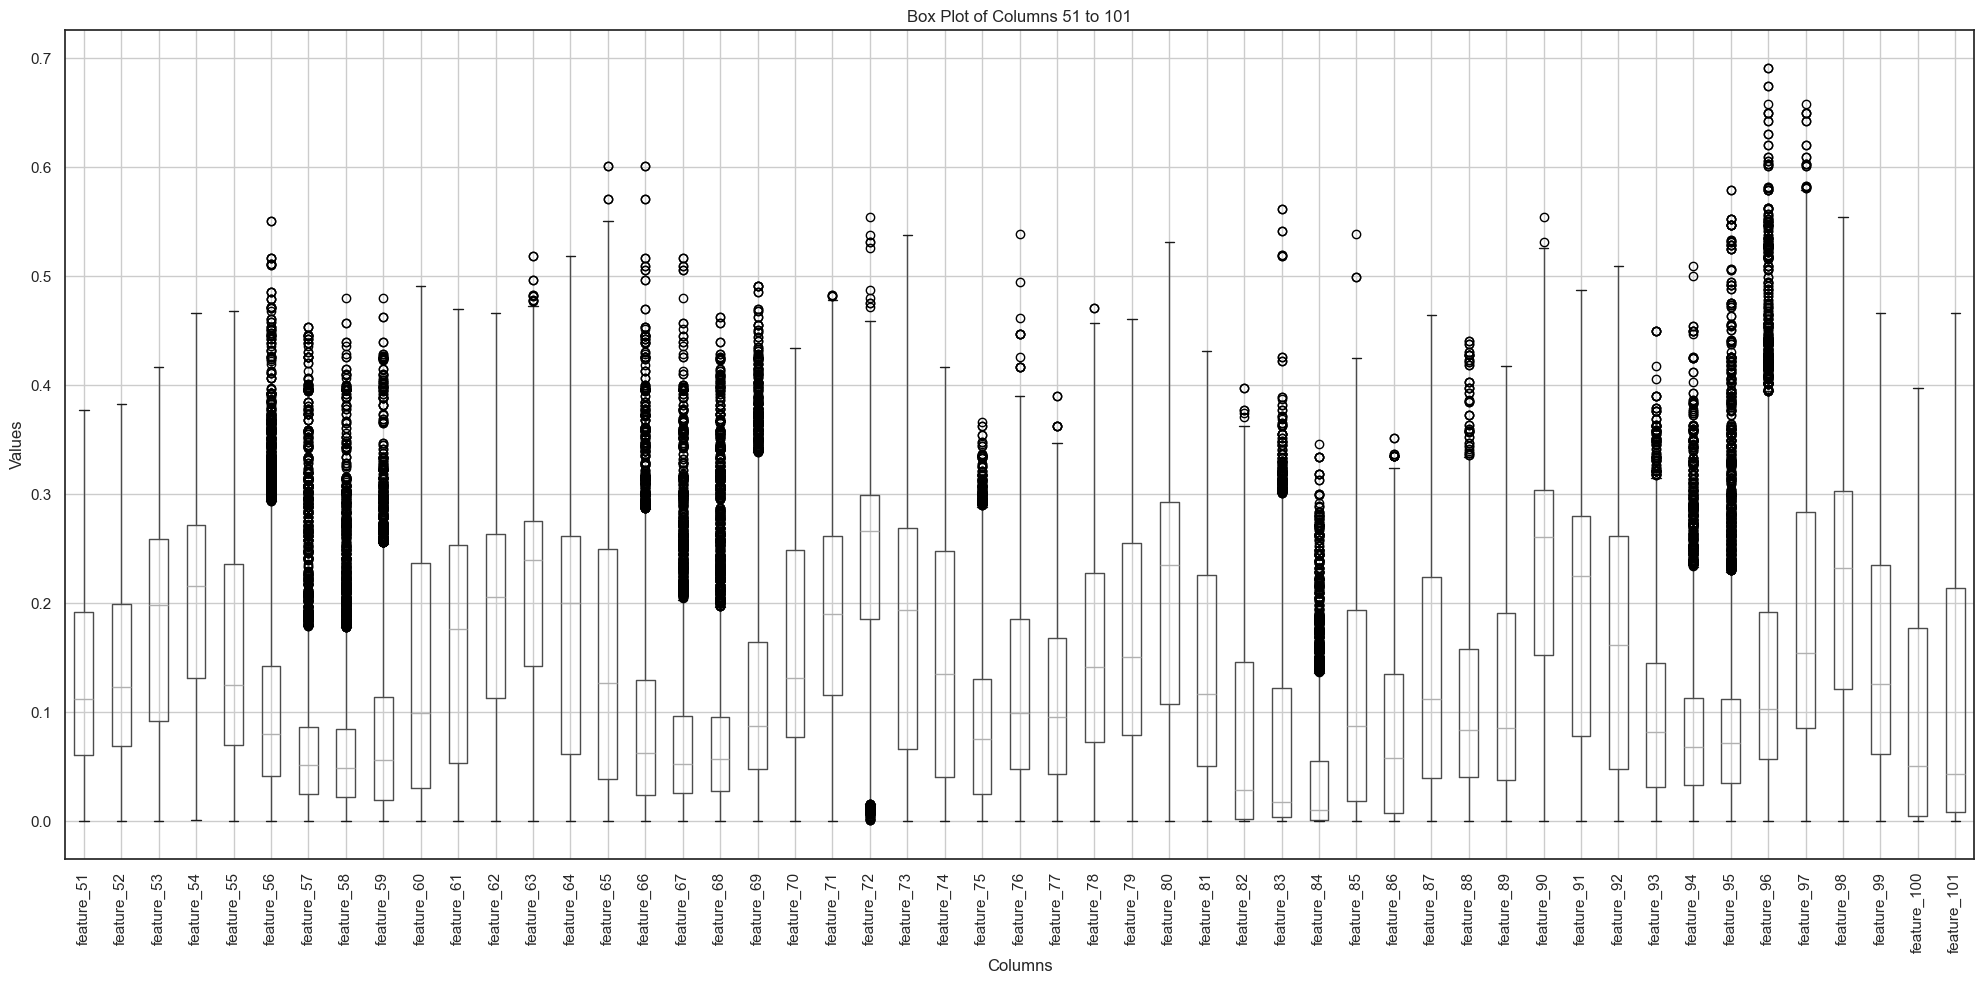

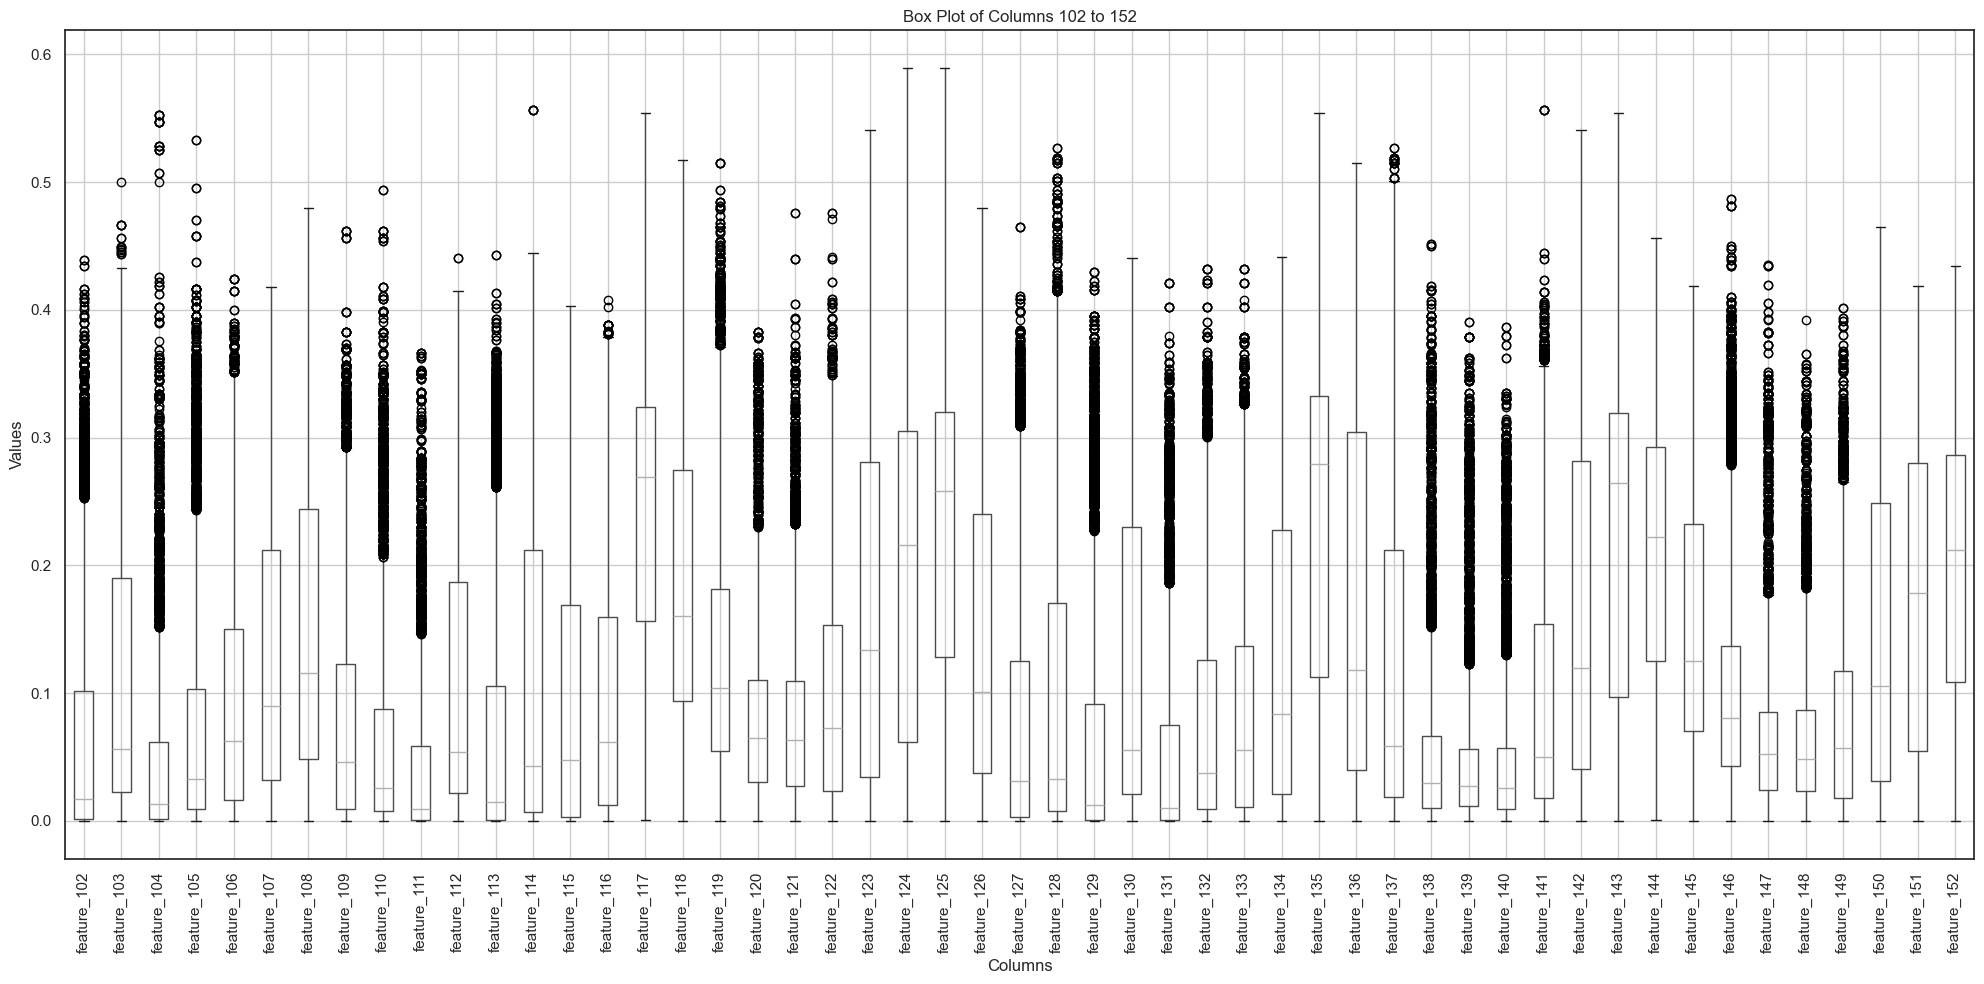

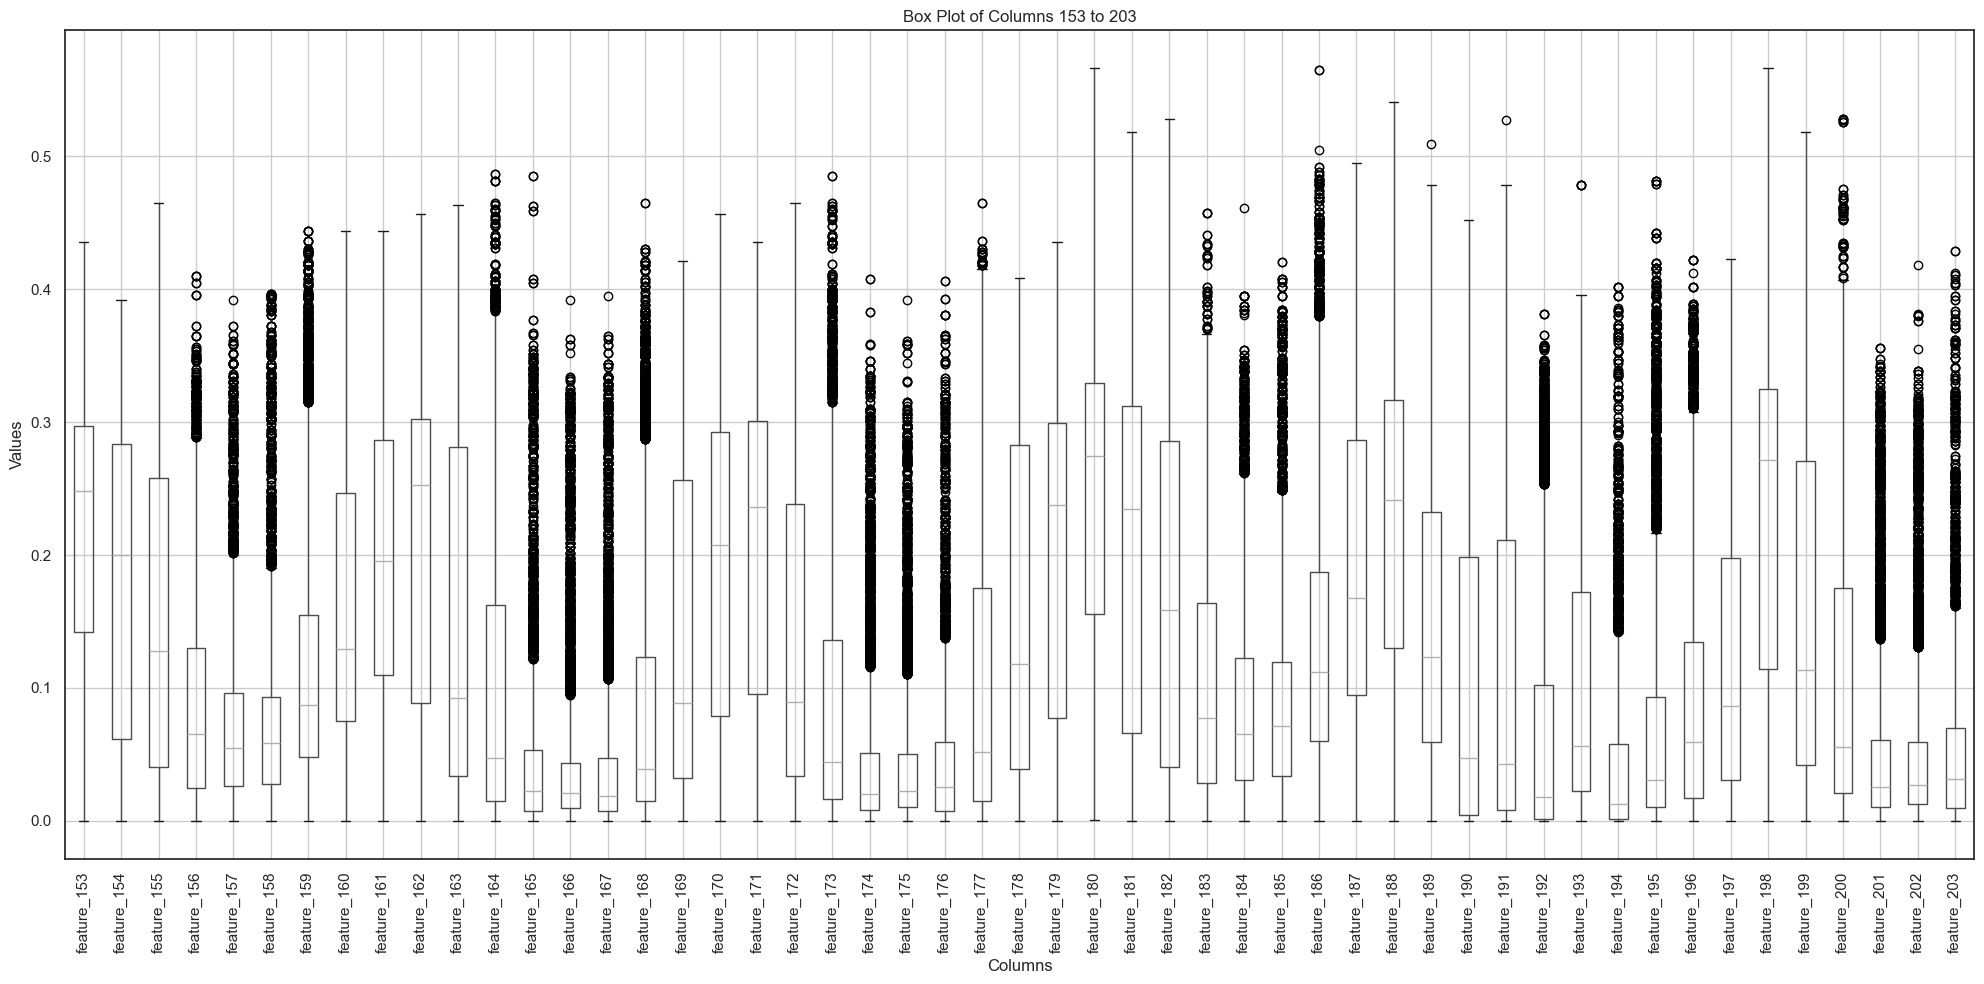

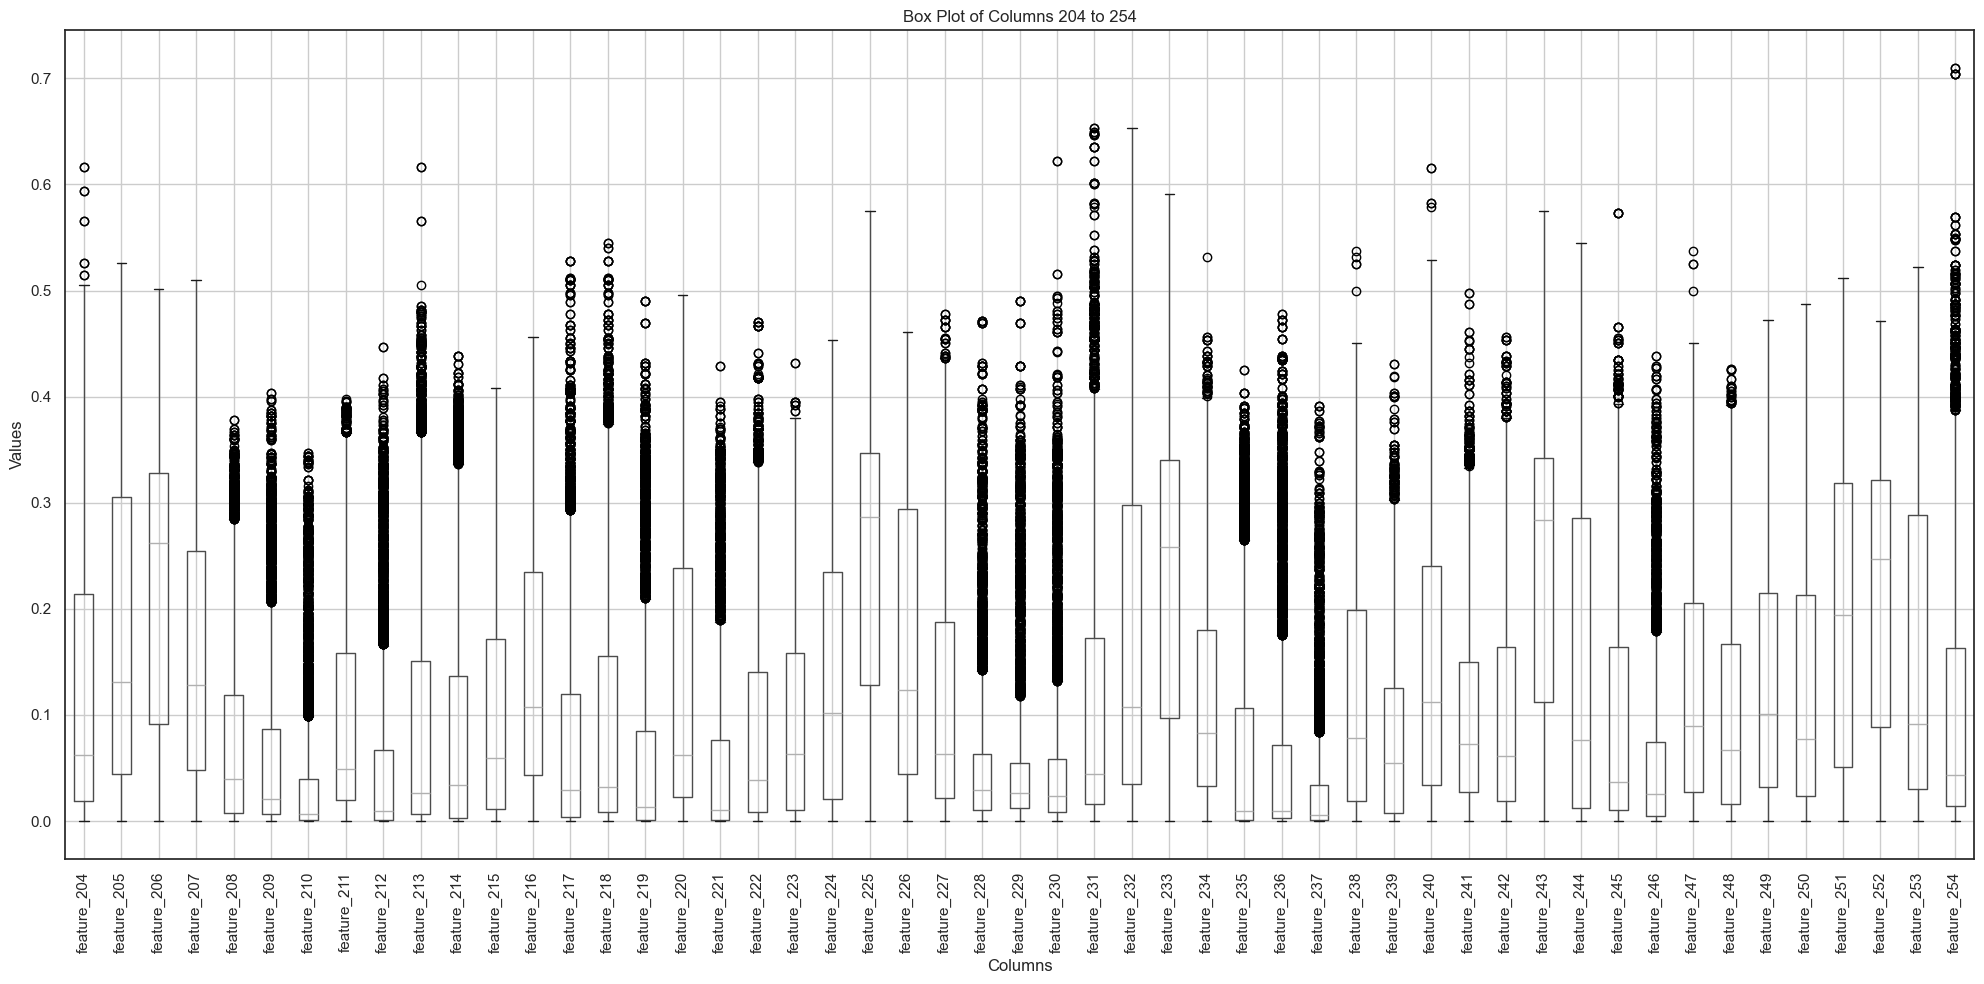

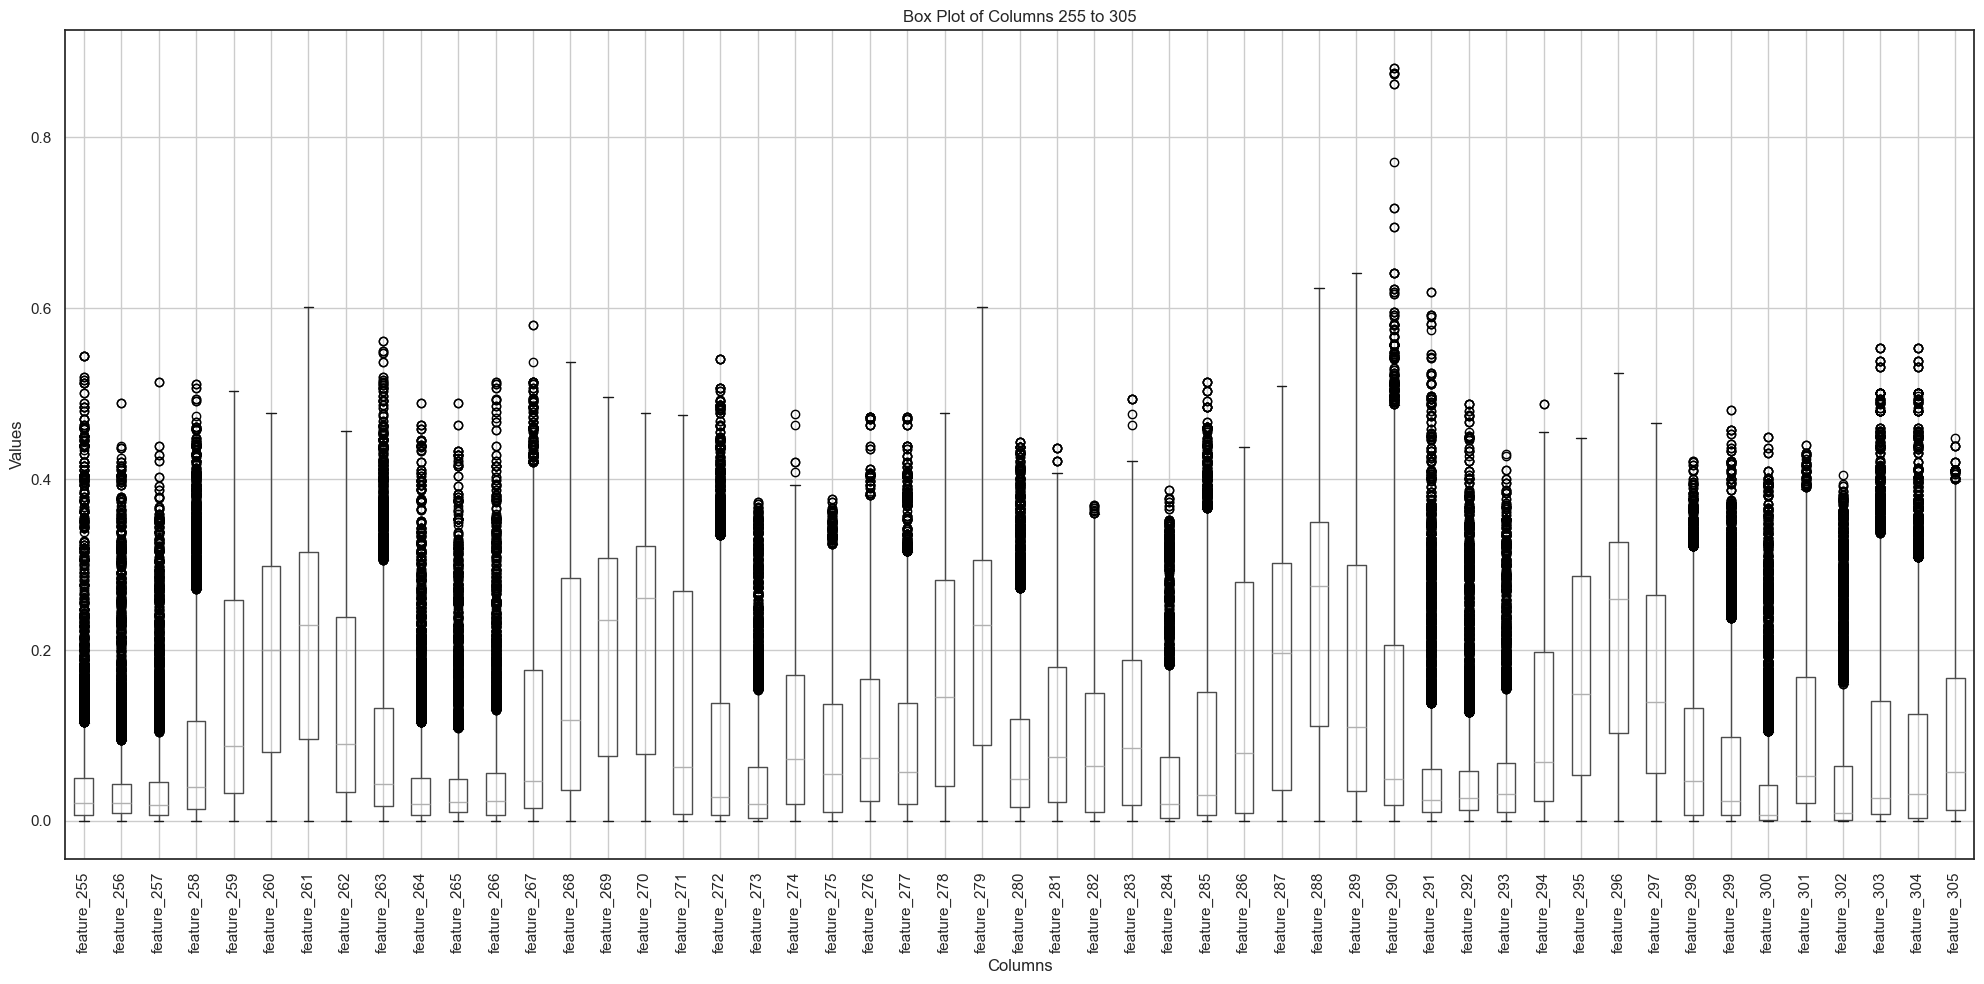

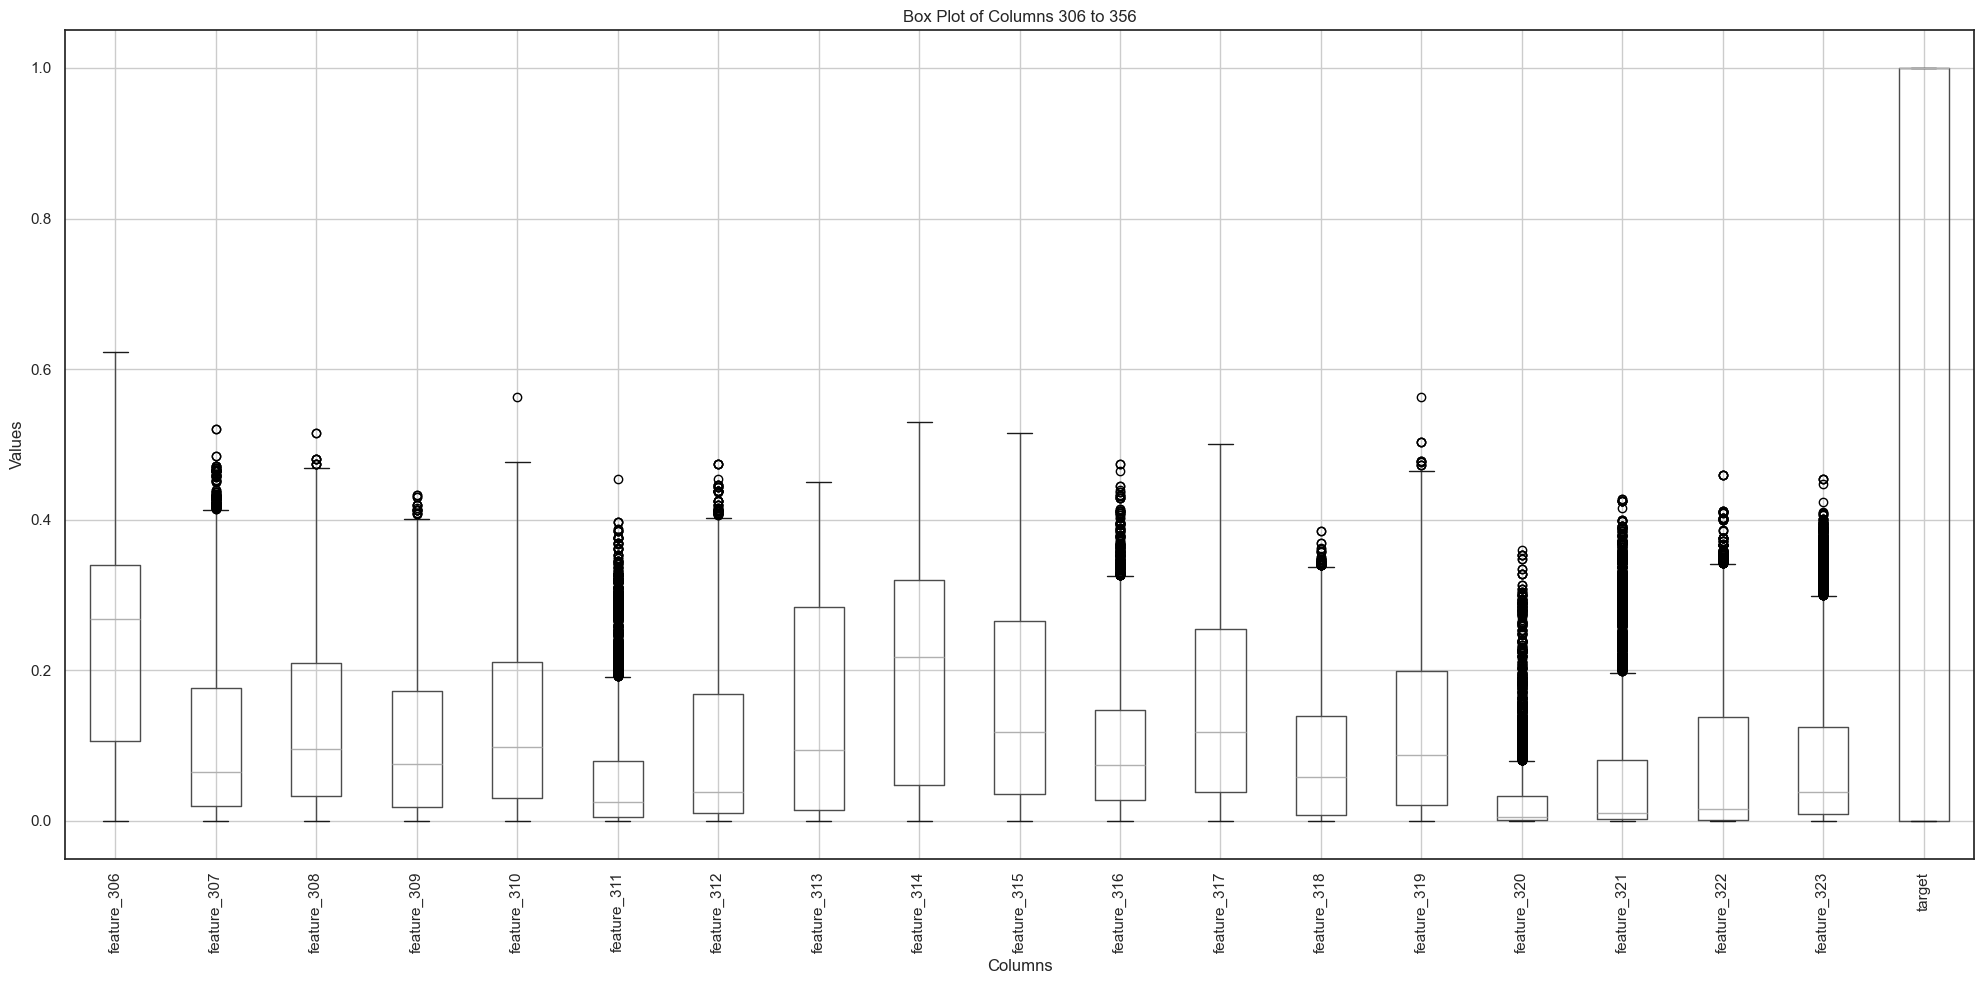

In [23]:
for i in range(0, 325, 51):  
    plt.figure(figsize=(20, 10))  
    data_subset = data.iloc[:, i:i+51]  #boxplot to show outliners of columns
    
    data_subset.boxplot()
    
    plt.title(f'Box Plot of Columns {i} to {i+50}')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=90)  
    
    plt.tight_layout()  
    plt.show()

In [24]:
def replace_outliers_with_median(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        
        median = df[col].median()  
        
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])  # Replace outliers
    
    return df  

data = replace_outliers_with_median(data)  # Update data

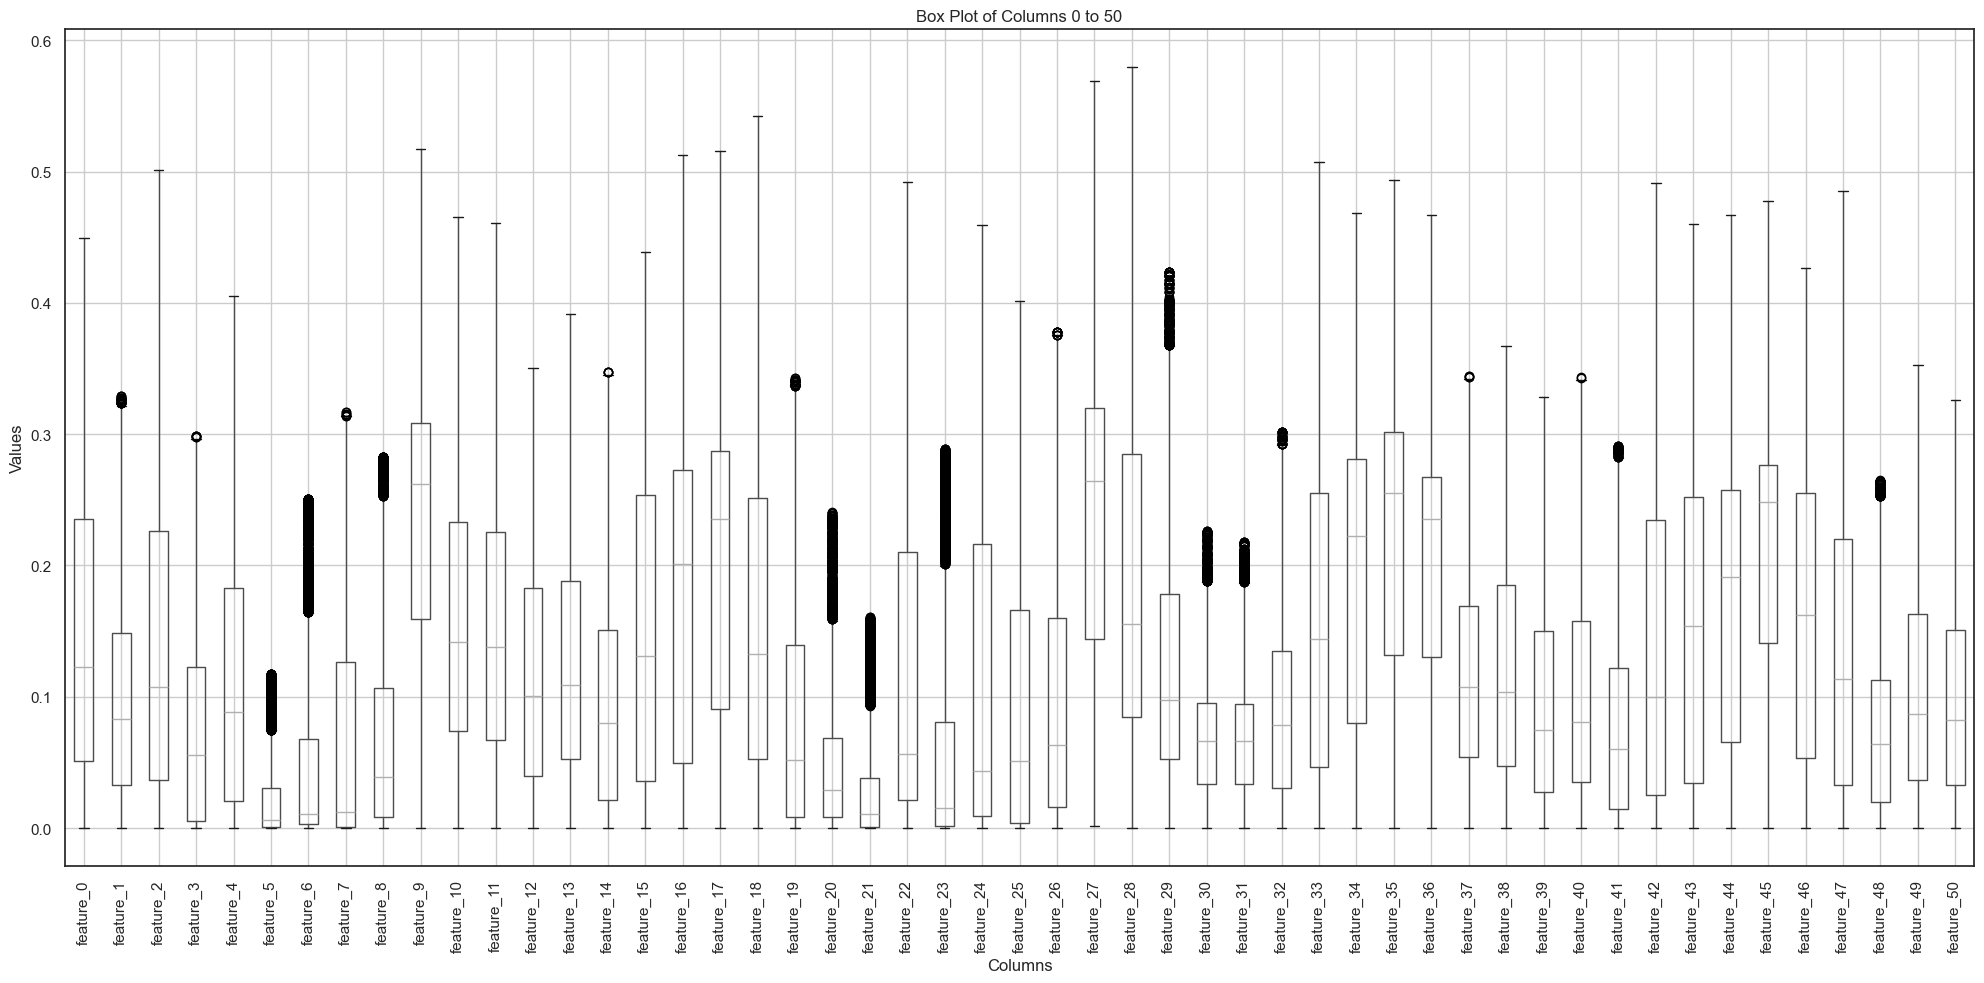

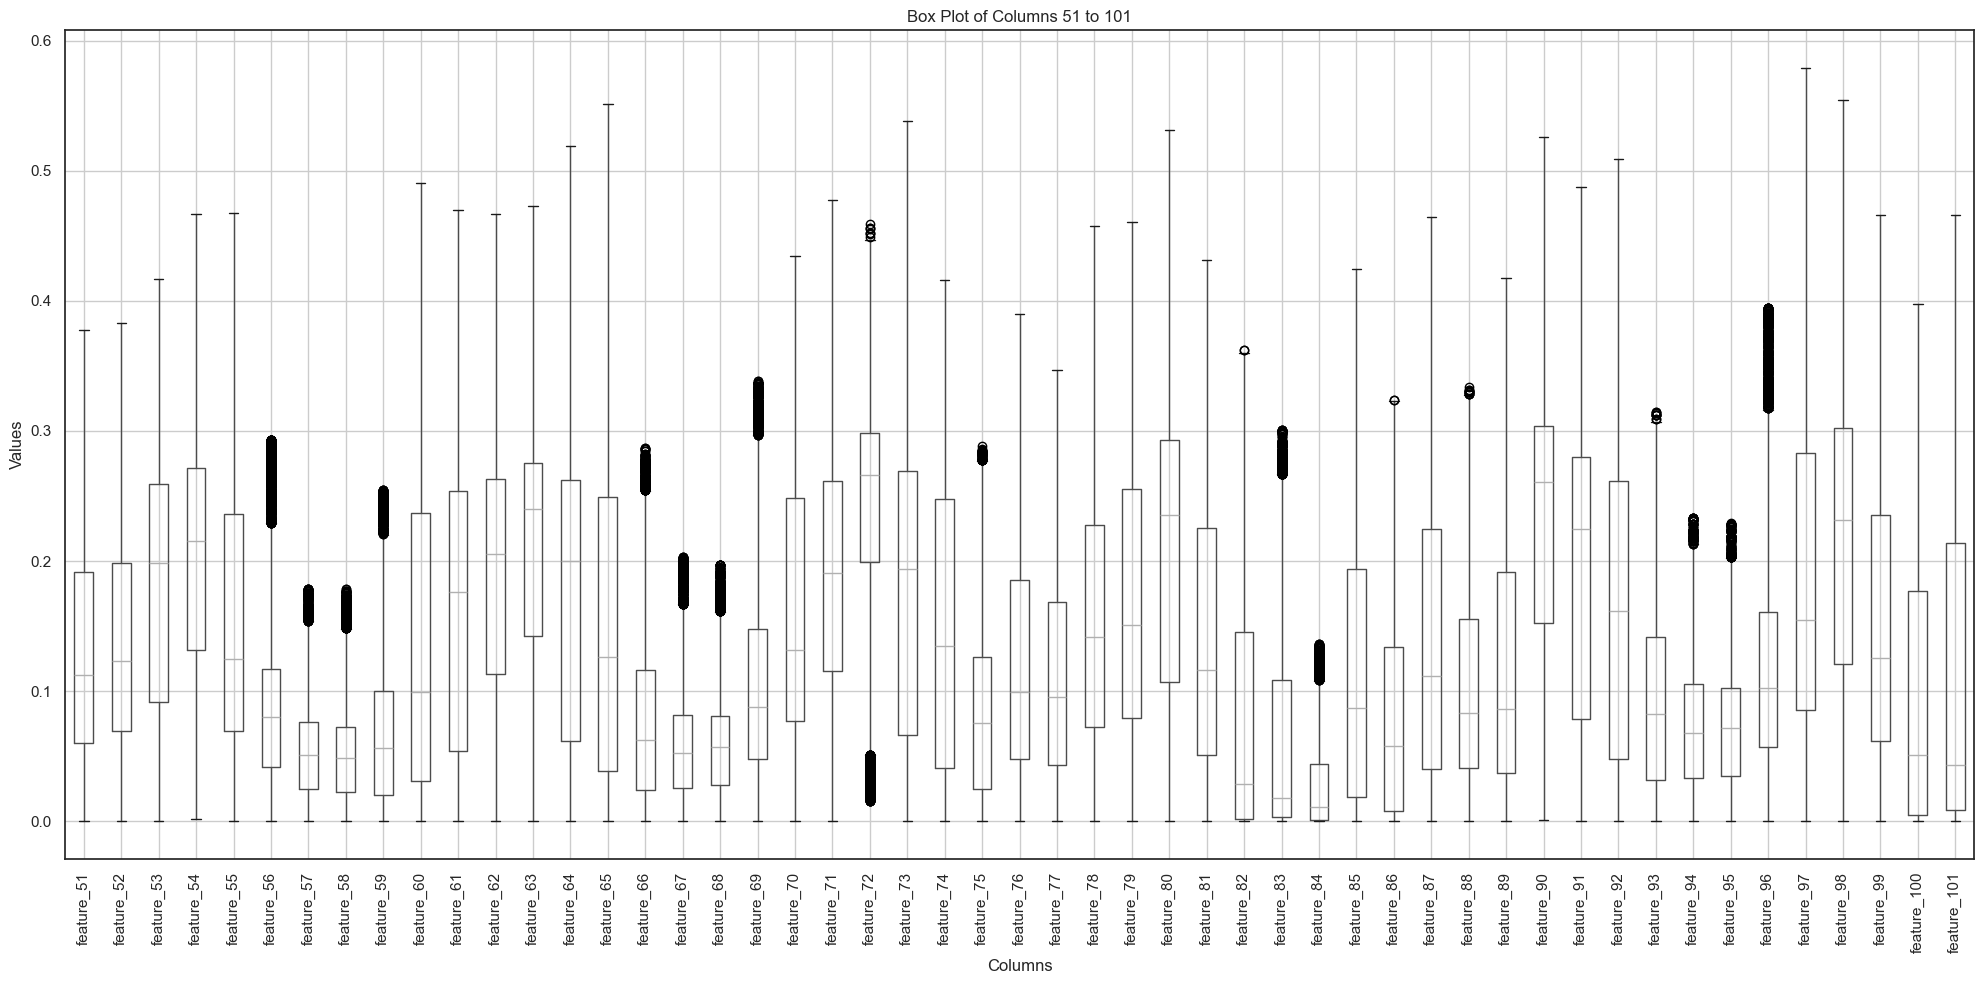

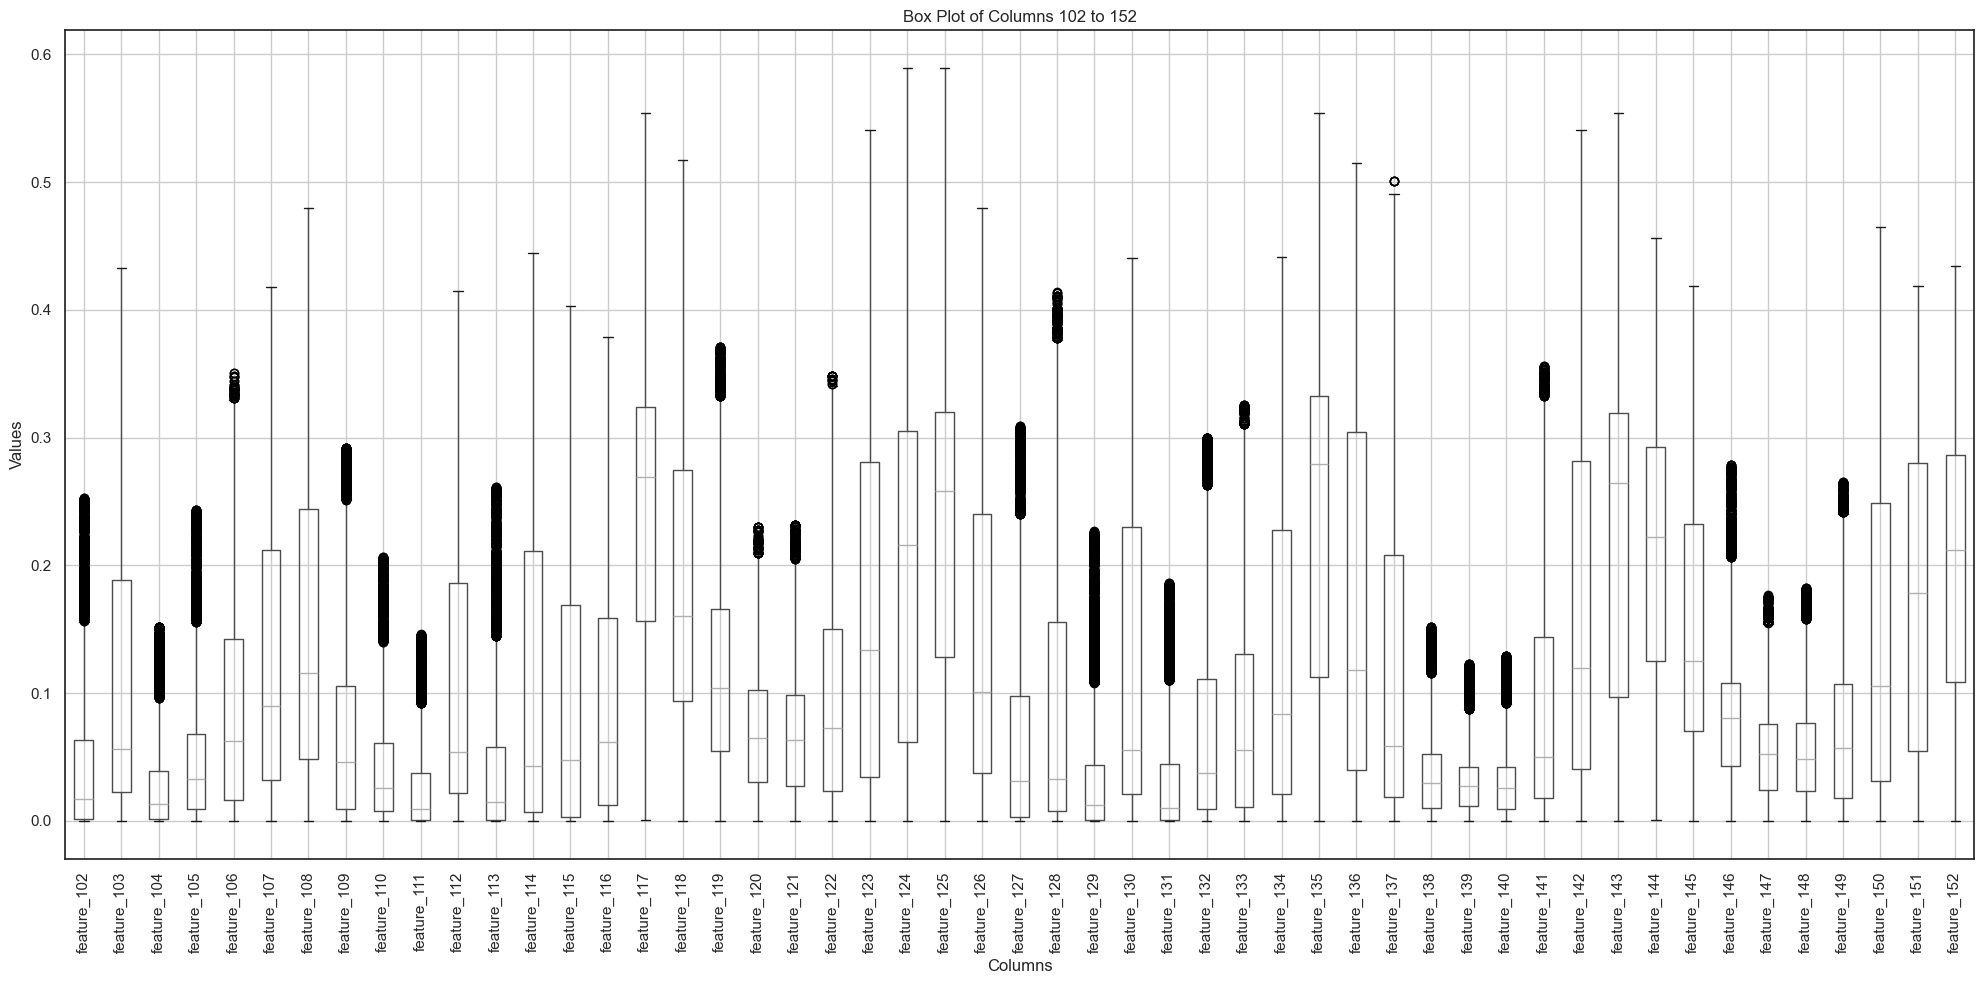

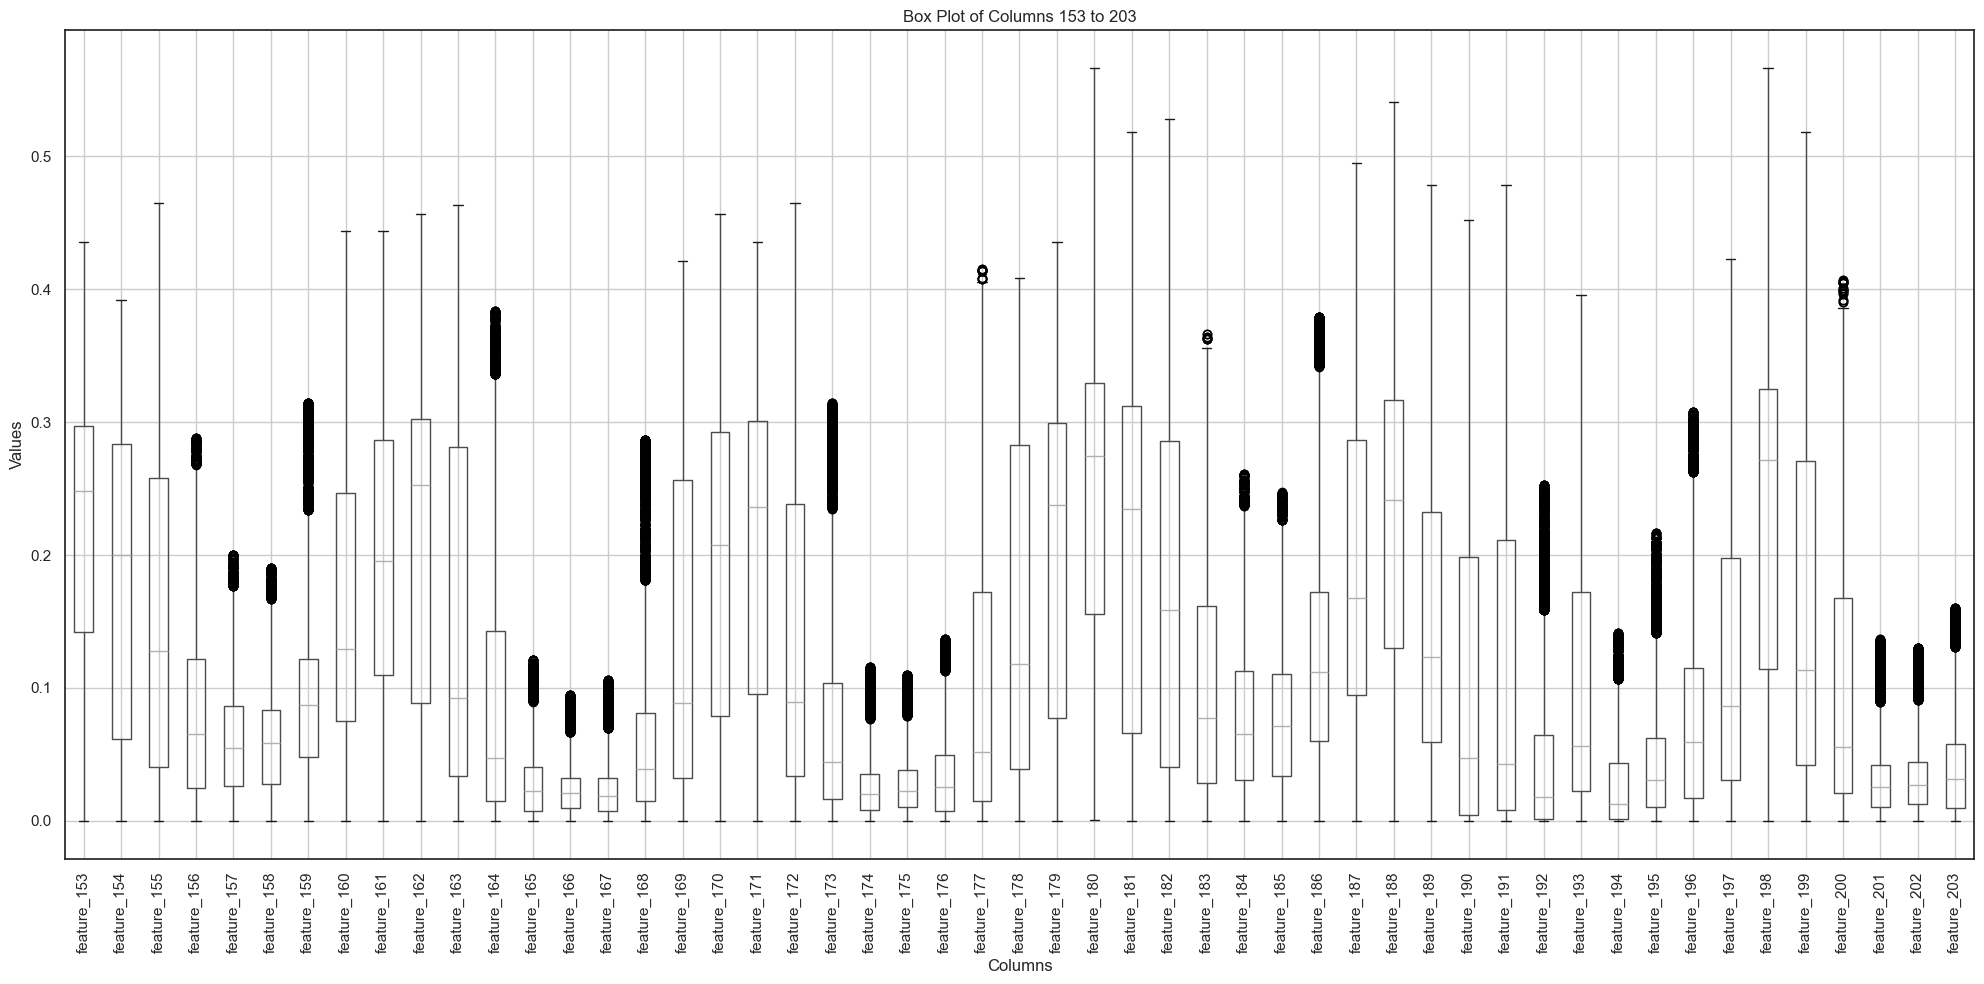

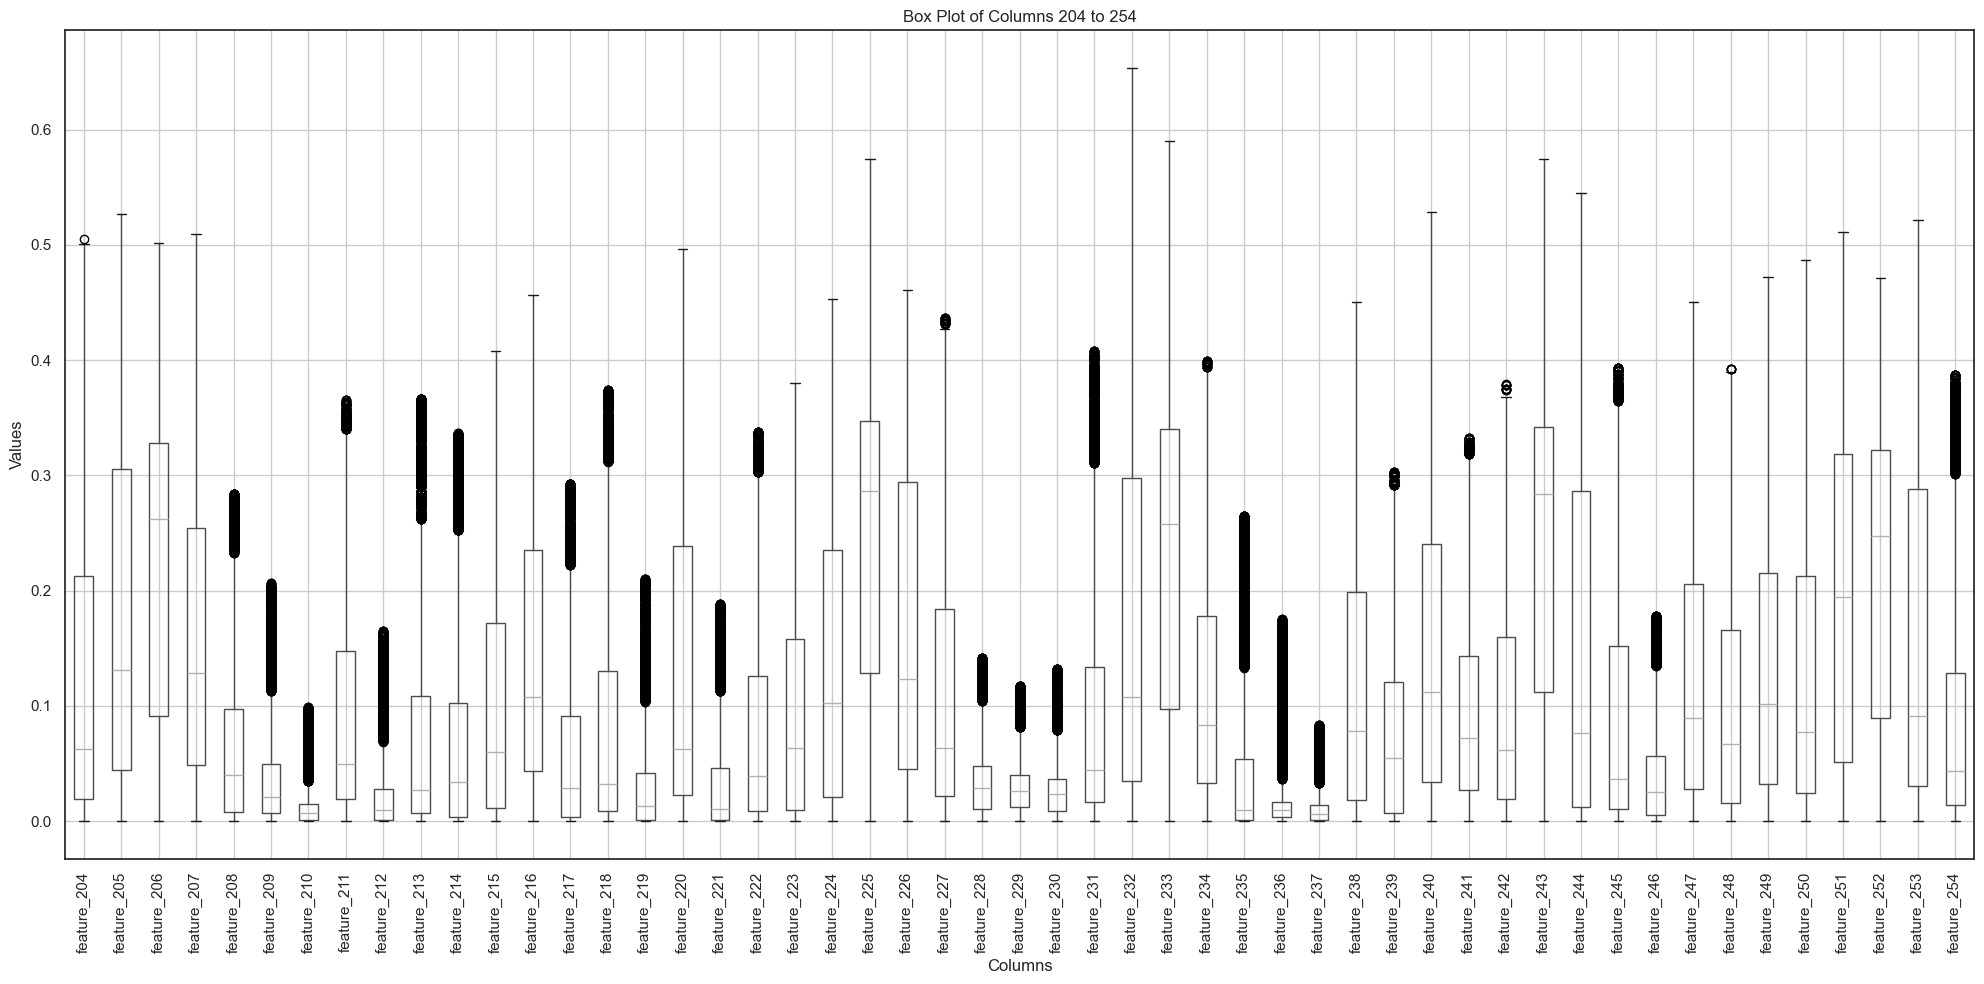

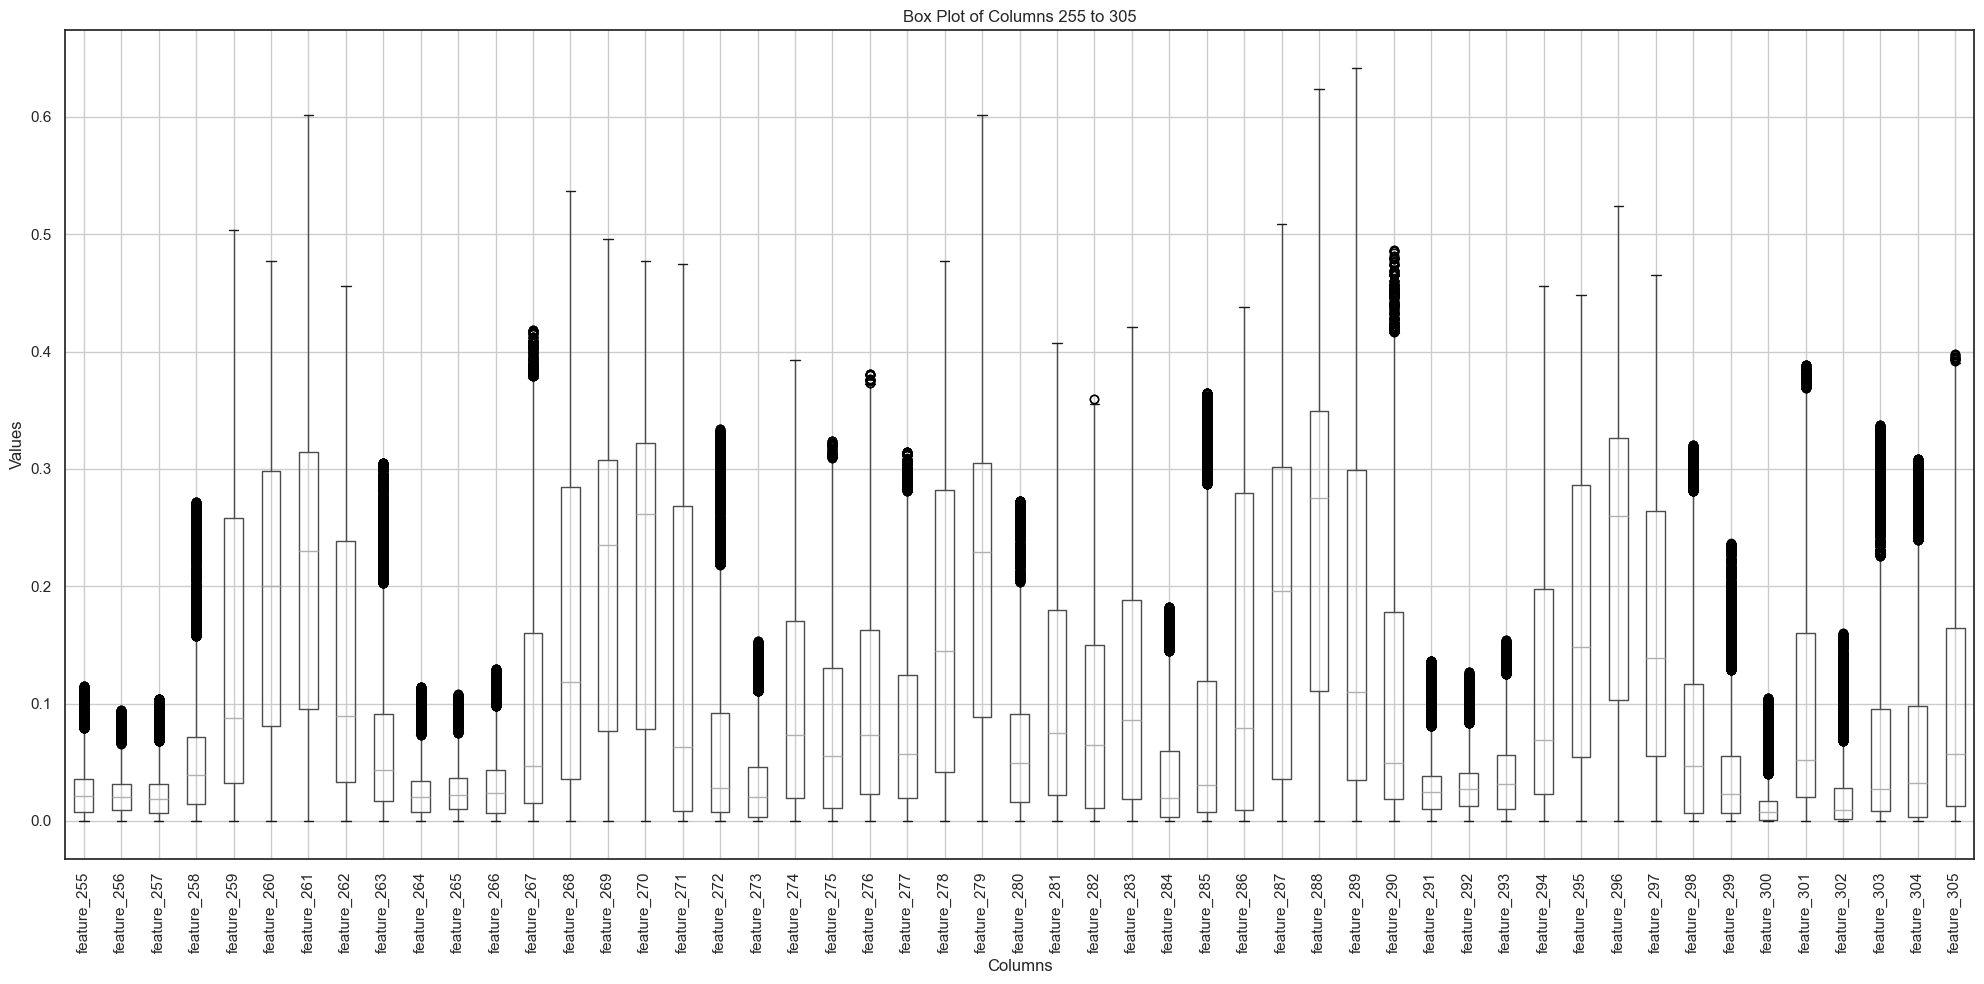

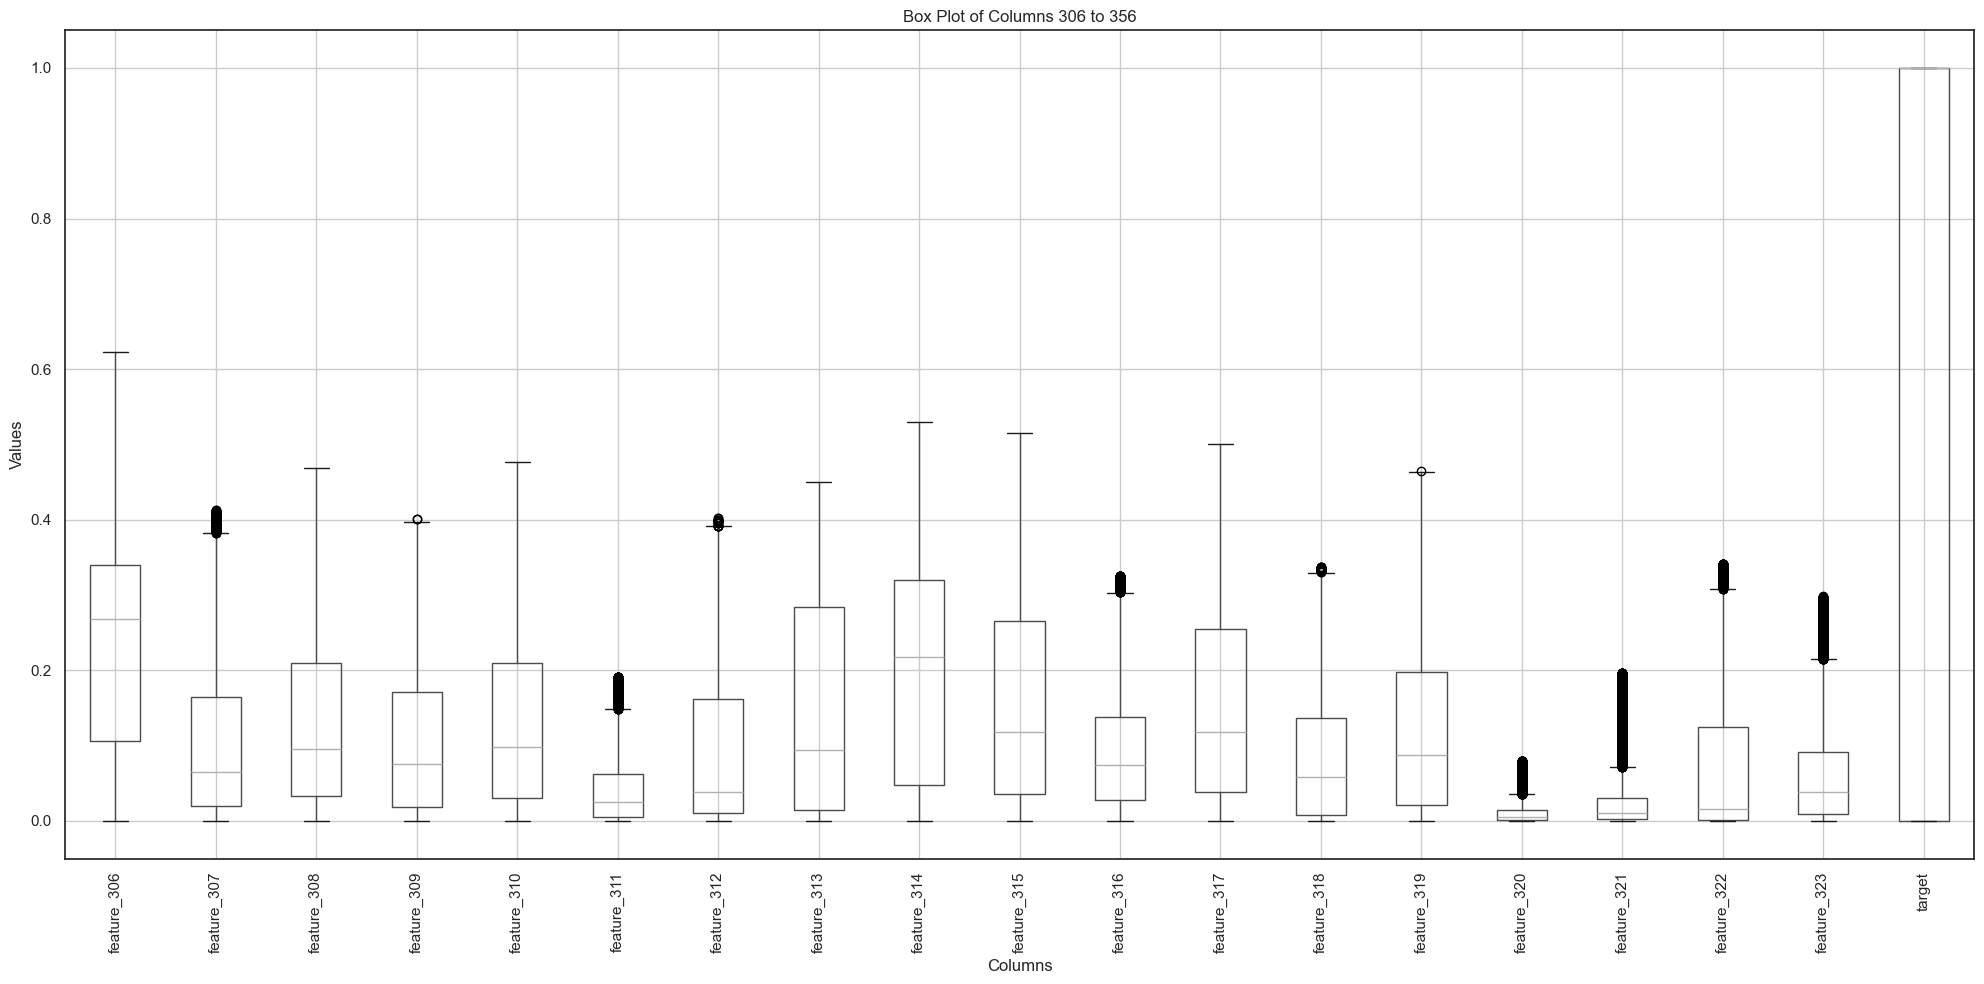

In [25]:
for i in range(0, 325, 51):  
    plt.figure(figsize=(20, 10))  
    data_subset = data.iloc[:, i:i+51]  #boxplot to show outliners of columns
    
    data_subset.boxplot()
    
    plt.title(f'Box Plot of Columns {i} to {i+50}')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=90)  
    
    plt.tight_layout()  
    plt.show()

In [26]:
X=data.drop(["target"],axis=1)
y=data["target"]
X.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.048080   0.086812   0.208633   0.199725   0.056522   0.014025   
1   0.307883   0.036147   0.000000   0.000000   0.006463   0.000000   
2   0.104897   0.045469   0.045993   0.047575   0.044669   0.059243   
3   0.249804   0.290694   0.014291   0.000000   0.015294   0.000000   
4   0.234648   0.172357   0.079099   0.155620   0.094315   0.067619   

   feature_6  feature_7  feature_8  feature_9  ...  feature_314  feature_315  \
0   0.007206   0.003890   0.006511   0.294622  ...     0.115086     0.313809   
1   0.000000   0.000000   0.038992   0.307883  ...     0.345108     0.074607   
2   0.011792   0.149731   0.061431   0.172501  ...     0.225027     0.048777   
3   0.000492   0.000777   0.004236   0.290694  ...     0.265383     0.105476   
4   0.052996   0.153778   0.222714   0.189006  ...     0.204470     0.257455   

   feature_316  feature_317  feature_318  feature_319  feature_320  \
0     0.001691     0.149201     0.006656     0.313809     0.037844   
1     0.001103     0.002789     0.000000     0.016765     0.000000   
2     0.009168     0.006490     0.004974     0.010133     0.006829   
3     0.007182     0.000000     0.000000     0.000584     0.009934   
4     0.078185     0.039438     0.020274     0.041940     0.031479   

   feature_321  feature_322  feature_323  
0     0.010062     0.116209     0.213859  
1     0.008368     0.001103     0.008998  
2     0.007592     0.009080     0.010919  
3     0.037404     0.191317     0.068310  
4     0.022735     0.054736     0.250030  

[5 rows x 324 columns]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)
print(f"x_train shape: {x_train.shape}\n")
print(f"x_test shape: {x_test.shape}\n")
print(f"y_train shape: {y_train.shape}\n")
print(f"y_test shape: {y_test.shape}\n")

x_train shape: (6542, 324)

x_test shape: (2805, 324)

y_train shape: (6542,)

y_test shape: (2805,)



# ML Models
 > SVC

In [29]:
SVC_Model=SVC(C=1,kernel="rbf")
cv_scores = cross_val_score(SVC_Model, x_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation accuracy: {np.mean(cv_scores):.2f}')

SVC_Model.fit(x_train,y_train)

Cross-validation scores for each fold: [0.98166539 0.97020626 0.97094801 0.97171254 0.98318043]
Average cross-validation accuracy: 0.98


SVC(C=1)

>> Elevation 

>>> Accuracy: 98.50

>>> CR by library method=
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1382
         1.0       0.99      0.98      0.99      1423

    accuracy                           0.99      2805
   macro avg       0.99      0.99      0.99      2805
weighted avg       0.99      0.99      0.99      2805

>>> Confusion_matrix=
 [[1368   14]
 [  28 1395]]



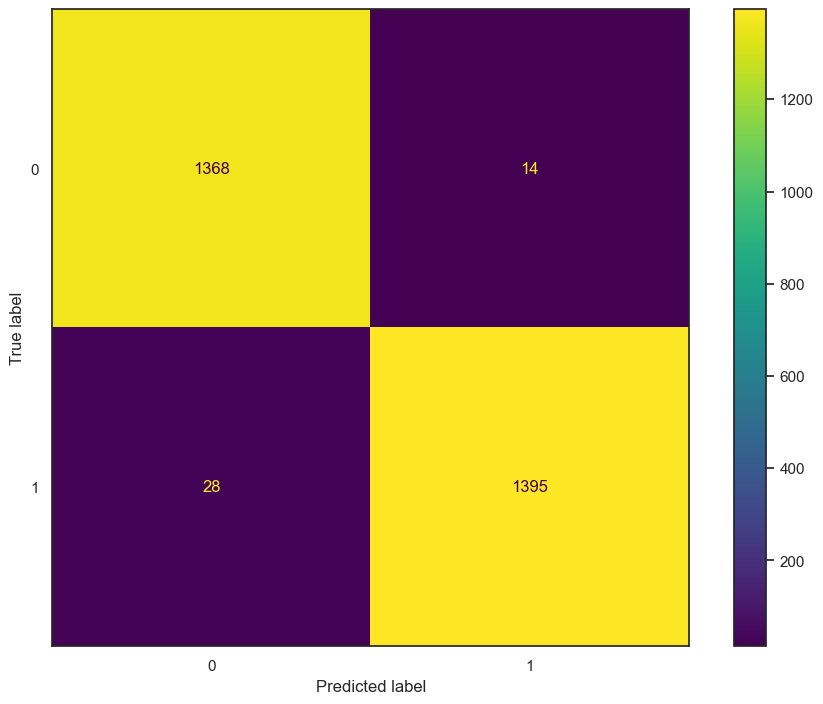

In [30]:
y_pred=SVC_Model.predict(x_test)
print(">> Elevation \n") 
accuracy_svc = accuracy_score(y_test, y_pred)*100
print(f">>> Accuracy: {accuracy_svc:.2f}\n")
print(">>> CR by library method=\n", classification_report(y_test, y_pred)) 
cm=confusion_matrix(y_test, y_pred)
print(f">>> Confusion_matrix=\n {cm}\n") 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()    

> KNN

In [32]:
knn_model=KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_model, x_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Average cross-validation accuracy: {np.mean(cv_scores):.2f}')
knn_model.fit(x_train,y_train)

Cross-validation scores for each fold: [0.97097021 0.96867838 0.97324159 0.97247706 0.98623853]
Average cross-validation accuracy: 0.97


KNeighborsClassifier()

>> Elevation 

>>> Accuracy: 98.25311942959001

>>> CR by library method=
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1382
         1.0       0.99      0.98      0.98      1423

    accuracy                           0.98      2805
   macro avg       0.98      0.98      0.98      2805
weighted avg       0.98      0.98      0.98      2805

>>> Confusion_matrix=
 [[1365   17]
 [  32 1391]]



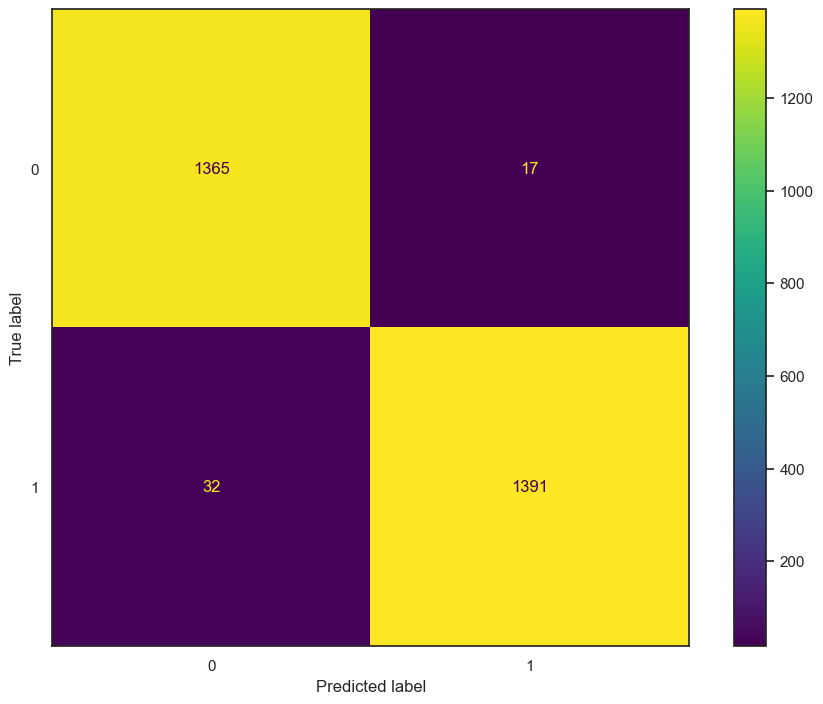

In [33]:
y_pred=knn_model.predict(x_test)
print(">> Elevation \n") 
accuracy_knn = accuracy_score(y_test, y_pred)*100
print(f">>> Accuracy: {accuracy_knn}\n")
print(">>> CR by library method=\n", classification_report(y_test, y_pred)) 
cm=confusion_matrix(y_test, y_pred)
print(f">>> Confusion_matrix=\n {cm}\n") 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()    

# test  file 

In [35]:
test_list = []
label = []

# Define paths to fractured and not fractured image folders and their corresponding target values
folder_paths = [
    'C:\\Users\\user\\Desktop\\project_models\\Bone_prediction\\Bone_Fracture_Binary_Classification\\test\\fractured',
    'C:\\Users\\user\\Desktop\\project_models\\Bone_prediction\\Bone_Fracture_Binary_Classification\\test\\not fractured'
]
target_values = ["fractured", "not fractured"]

# Loop through each folder and corresponding target value
for folder_path, target in zip(folder_paths, target_values):
    for filename in os.listdir(folder_path):  # Loop through each file in the folder
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)  # Full path to the image
            try:
                # Extract HOG features and append to lists
                features = extract_hog_features(image_path)
                test_list.append(features)
                label.append(target)
            except FileNotFoundError as e:
                print(f"File not found: {e}")  # Handle file not found errors
            except Exception as e:
                print(f"An error occurred: {e}") 

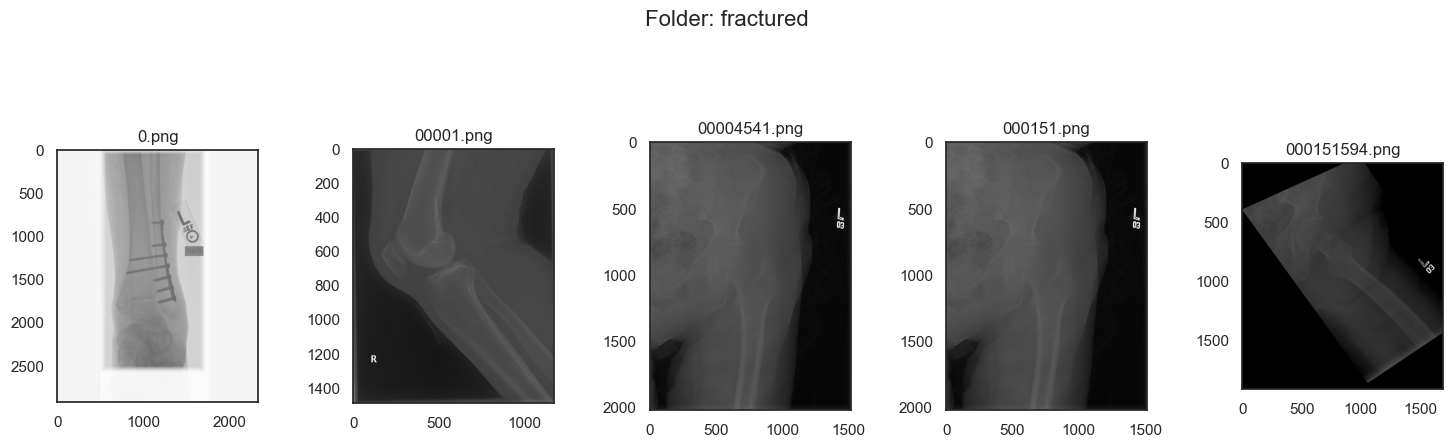

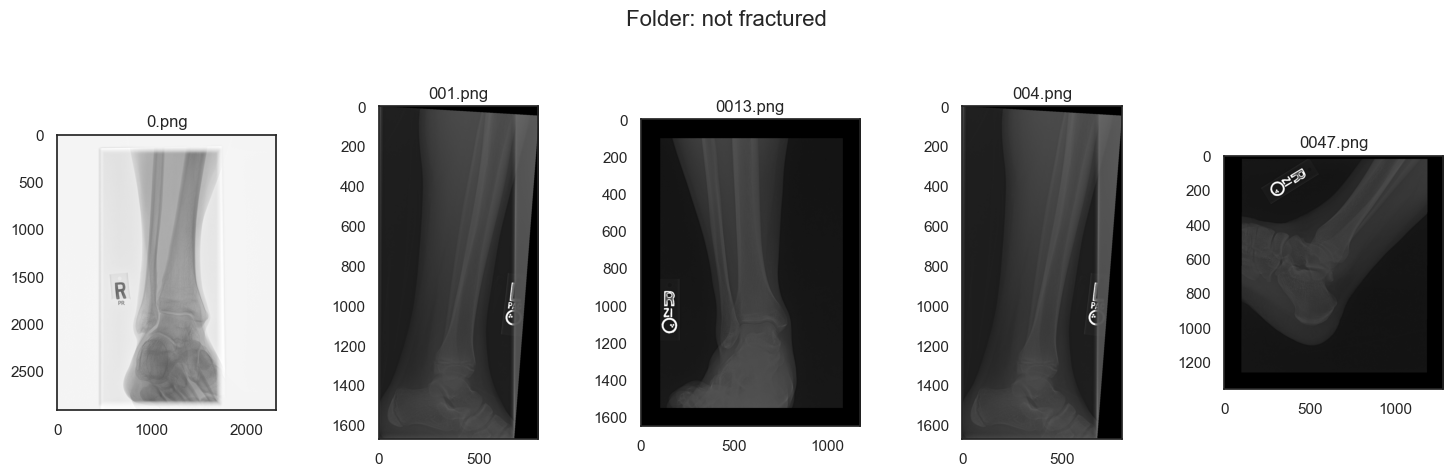

In [36]:
for folder_path in folder_paths:
   display_images_with_folder_name(folder_path)

In [37]:
# Assuming 'test_list' is defined
# Step 1: Filter out None values from test_list
targets_list = [f for f in test_list if f is not None]

# Step 2: Filter 'targets' list based on 'test_list'
filtered_targets = [label[i] for i in range(len(test_list)) if test_list[i] is not None]

# Step 3: Get lengths of feature vectors
feature_lengths = [len(f) if isinstance(f, (list, np.ndarray)) else 0 for f in targets_list]
print(f"Unique lengths: {set(feature_lengths)}")

# Step 4: Find the max length to pad features
max_len = max([len(f) for f in targets_list if isinstance(f, (list, np.ndarray))])

# Step 5: Pad or truncate feature vectors to uniform length
test_list_padded = [
    list(f) + [0] * (max_len - len(f)) if len(f) < max_len else f[:max_len]
    for f in targets_list
]

# Step 6: Convert to NumPy array
X = np.array(test_list_padded)

# Step 7: Create DataFrame from the padded features
data_test = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Step 8: Add filtered targets as a column
data_test['target'] = filtered_targets

# Step 9: Verify the shape of the DataFrame and lengths of targets
print(f"Data_test shape: {data_test.shape}")
print(f"Targets length: {len(filtered_targets)}")


Unique lengths: {324}
Data_test shape: (506, 325)
Targets length: 506


In [38]:
data_test.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.307883   0.036147   0.000000   0.000000   0.006463   0.000000   
1   0.266820   0.041131   0.017927   0.009591   0.142300   0.050762   
2   0.217833   0.140359   0.171101   0.164491   0.217833   0.096853   
3   0.217833   0.140359   0.171101   0.164491   0.217833   0.096853   
4   0.047661   0.019011   0.403333   0.022679   0.403333   0.032533   

   feature_6  feature_7  feature_8  feature_9  ...  feature_315  feature_316  \
0   0.000000   0.000000   0.307883   0.307883  ...     0.074607     0.001103   
1   0.038834   0.048791   0.266820   0.266820  ...     0.090339     0.001669   
2   0.201574   0.212384   0.169129   0.217833  ...     0.204407     0.013988   
3   0.201574   0.212384   0.169129   0.217833  ...     0.204407     0.013988   
4   0.187393   0.009890   0.012530   0.184358  ...     0.023238     0.198506   

   feature_317  feature_318  feature_319  feature_320  feature_321  \
0     0.002789     0.000000     0.016765     0.000000     0.008368   
1     0.012293     0.025579     0.106169     0.120368     0.383453   
2     0.043683     0.011025     0.202389     0.012547     0.026206   
3     0.043683     0.011025     0.202389     0.012547     0.026206   
4     0.332358     0.195467     0.309038     0.226895     0.045191   

   feature_322  feature_323     target  
0     0.001103     0.008998  fractured  
1     0.208860     0.036207  fractured  
2     0.008476     0.054173  fractured  
3     0.008476     0.054173  fractured  
4     0.020290     0.005093  fractured  

[5 rows x 325 columns]

In [39]:
data_test.target

0          fractured
1          fractured
2          fractured
3          fractured
4          fractured
           ...      
501    not fractured
502    not fractured
503    not fractured
504    not fractured
505    not fractured
Name: target, Length: 506, dtype: object

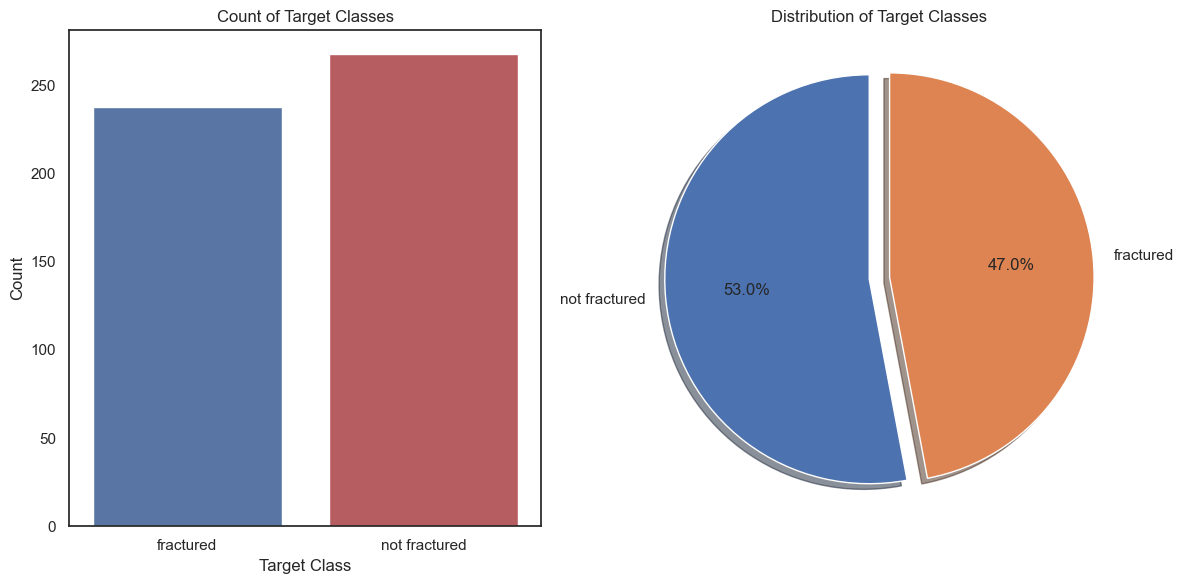

In [40]:
# Set up the figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=data_test["target"],palette=["b","r"])
plt.title('Count of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
plt.pie(data_test["target"].value_counts(), labels=data_test["target"].value_counts().index, autopct='%1.1f%%', startangle=90,shadow=True,explode=[.1,0])
plt.title('Distribution of Target Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plots
plt.tight_layout()
plt.show()

In [41]:
# Replace target values
data_test['target'] = data_test['target'].replace(['fractured', 'not fractured'], [1, 0])

In [42]:
data_test=replace_outliers_with_median(data_test)

In [43]:
xx=data_test.drop(["target"],axis=1)
yy=data_test["target"]

In [44]:
Model=SVC_Model

In [45]:
yy_pred=Model.predict(xx)

>> Elevation 

>>> Accuracy: 93.2806324110672

>>> CR by library method=
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       268
         1.0       0.90      0.96      0.93       238

    accuracy                           0.93       506
   macro avg       0.93      0.93      0.93       506
weighted avg       0.93      0.93      0.93       506

>>> Confusion_matrix=
 [[244  24]
 [ 10 228]]



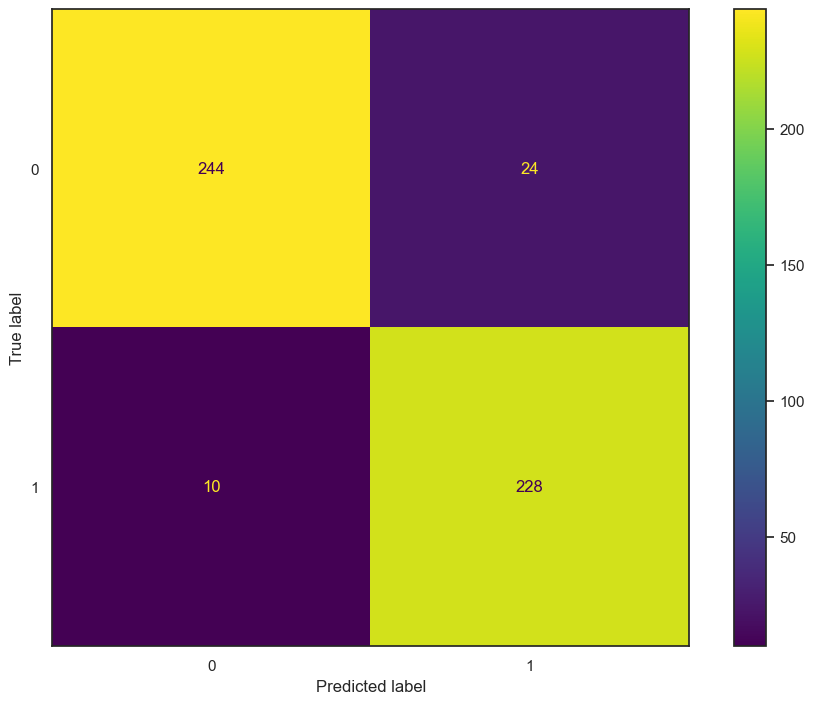

In [46]:
y_pred=Model.predict(xx)
print(">> Elevation \n") 
accuracy_knn = accuracy_score(yy, yy_pred)*100
print(f">>> Accuracy: {accuracy_knn}\n")
print(">>> CR by library method=\n", classification_report(yy, yy_pred)) 
cm=confusion_matrix(yy, yy_pred)
print(f">>> Confusion_matrix=\n {cm}\n") 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()    

# Prompt the user for the image file path

In [103]:
from tkinter import Tk, Label, Button, filedialog, messagebox
from PIL import Image, ImageTk  # To handle images in Tkinter

# Load the image and process it
def load_image():
    file_path = filedialog.askopenfilename(title="Select an Image File", 
                                           filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
    
    if file_path:
        # Load the image using OpenCV
        image_test = cv2.imread(file_path)

        if image_test is not None:
            # Convert the image from BGR to RGB format for display
            image_rgb = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
            image_pil = Image.fromarray(image_rgb)  # Convert to PIL image
            image_tk = ImageTk.PhotoImage(image_pil)  # Convert to Tkinter-compatible image

            # Update the image in the GUI
            image_label.config(image=image_tk)
            image_label.image = image_tk  # Keep a reference to avoid garbage collection
        else:
            messagebox.showerror("Error", "Error loading image. Please check the file path.")
            return

        # Extract features from the specified image
        features = extract_hog_features(file_path)
        features_list_1 = []  # Make a list to store features
        features_list_1.append(features)

        if features is not None:
            features_array = np.array(features_list_1)
            features_image = pd.DataFrame(features_array, columns=[f'feature_{i}' for i in range(features_array.shape[1])])

            # Handle outliers
            features_image = replace_outliers_with_median(features_image)

            # Make a prediction (Ensure 'Model' is defined and fitted)
            prediction = Model.predict(features_image)

            if prediction == 0:
                prediction_label = "غير مكسور"
            else:
                prediction_label = "مكسور"
            
            # Update prediction label in GUI
            result_label.config(text=f"Prediction: {prediction_label}")
        else:
            messagebox.showerror("Error", "Failed to extract features.")
    else:
        messagebox.showwarning("File Selection", "No file selected.")

# Setting up the Tkinter GUI
def run_gui():
    global image_label, result_label  # Make these labels accessible within load_image
    root = Tk()
    root.title("Bone Fracture Prediction")

    # Create a label for instructions
    label = Label(root, text="Select an image file to predict if the bone is fractured.")
    label.pack(pady=10)

    # Create a button to load the image
    button = Button(root, text="Load Image", command=load_image)
    button.pack(pady=5)

    # Create a label to display the image
    image_label = Label(root)
    image_label.pack(pady=10)

    # Create a label to display the prediction result
    result_label = Label(root, text="Prediction: ")
    result_label.pack(pady=10)

    # Start the Tkinter main loop
    root.mainloop()

# Run the GUI
run_gui()